In [1]:
import sys

sys.path.append('..')

from cnsproject.plotting.plotting import draw_decision_plots
from cnsproject.network.connections import DenseConnection, RandomConnection
from cnsproject.utils import run_decision_simulation

fig_size = (19, 11)
%matplotlib inline

# Introduction

In this project, we simulate a system with two excitatory populations, indirectly
connected with an inhibitory population in between. You can see the connections'
scheme in the image below. In this system, we assume the two excitatory
populations are equivalent (statistically not ideally). This system emulates
a decision condition in the brain. Excitatory populations represents the areas
of the brain that are making the decision, and the input currents represent the
signal that affects the decision-making.

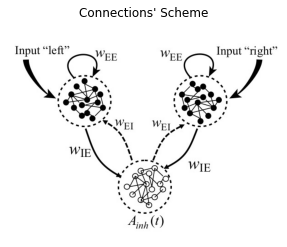

In [2]:
import matplotlib.pyplot as plt

connection_scheme = plt.imread("connections.jpeg")
plt.imshow(connection_scheme, cmap='gray')
plt.axis('off')
plt.title("Connections' Scheme")
plt.show()

The goal is to apply different inputs to these EPs and see what changes in the
activity pattern of the populations. Also, different connection parameters and
type of connections will be tested.

Abbreviations:

1. EE: Excitatory to Excitatory connection
2. EI: Excitatory to Inhibitory connection
3. EE: Inhibitory to Excitatory connection
4. EP: Excitatory Population
5. IP: Inhibitory Population

# Experiments

We assume three types of connections for the experiments: EE, EI and IE, and
EE1 and EE2 will be equal (in type of connection and the parameters).
Likewise for EIs and IEs. connection_types[0] refers to EE, 1 to EI and 2 to IE.
the same logic applies for $j_0$, $\sigma_0$ and $n_{connections}$ in
random connection.

In all the experiments we fix these parameters unless mentioned:

$\sigma_{n_{time}} = 5$

$\sigma_{n_{neuron}} = 4$

$Total_{N_{neurons}}=1000$

$EP1_{N_{neurons}} = EP2_{N_{neurons}} = 400,$
$EP_{u_{rest}} = -65mv, EP_{threshold}=-50mv, EP_{tau}=50$

$IP_{N_{neurons}} = 200,$
$IP_{u_{rest}} = -65mv, IP_{threshold}=-60mv, IP_{tau}=25$

$\sigma_{0_{EE}}= \sigma_{0_{EI}}= \sigma_{0_{IE}}=0.2$

$ I_{base} = 20 $

$time_{sim} = 2000 ms$

Note: Savitzky–Golay filter with a degree of 3 is applied to populations'
activities before plotting to smoothen out the plots and make them comprehensible.

## Experiment #1

In the first experiment, we use dense connection for all three types of connections,
Dense connection parameters:

$j_{EE}=0.1, j_{EI}=5, j_{IE}=20$



We also feed the same input to both excitatory populations to create a baseline.

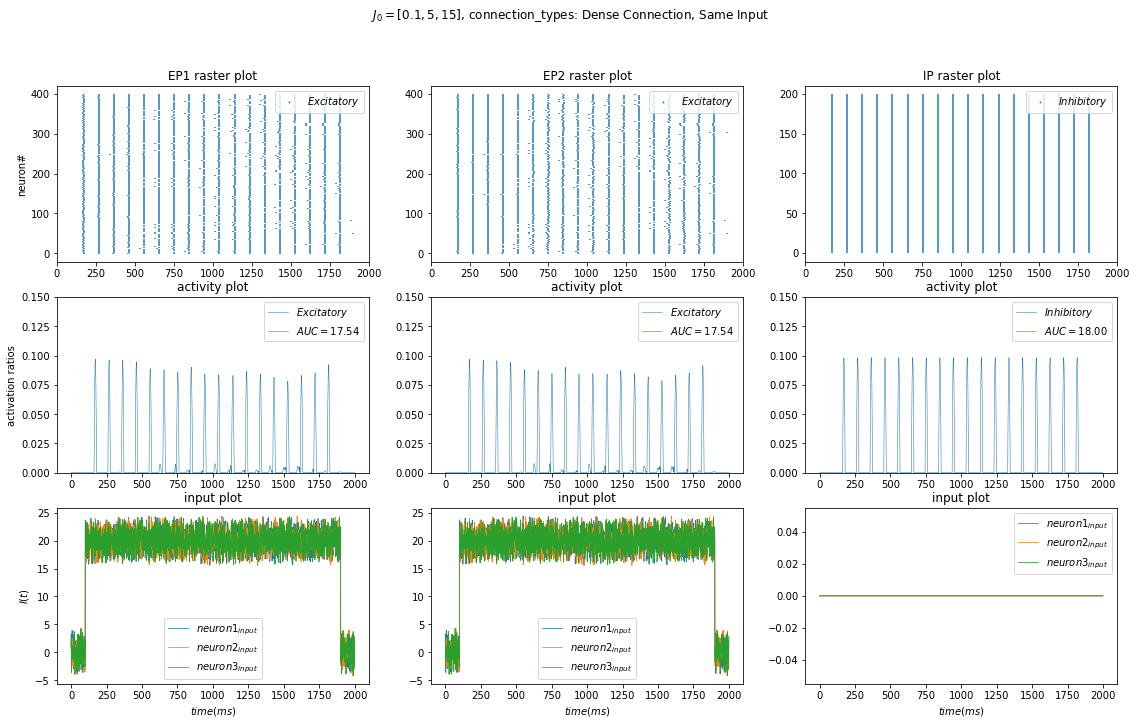

In [2]:
connection_types = [DenseConnection, DenseConnection, DenseConnection]
j0 = [0.1, 5, 15]
m1, m2, m3 = run_decision_simulation(
    connection_types=connection_types,
    j0=j0,
)

title = "$J_0 = {}$, connection_types: {}, Same Input".format(j0, "Dense Connection")
monitor_names = ['EP1 raster plot', 'EP2 raster plot', 'IP raster plot']
draw_decision_plots([m1, m2, m3], monitor_names=monitor_names,
                    figsize=fig_size, event_plot=True, title=title)

As expected, all populations have almost the same activity pattern.

Now we apply an additional step current with an amplitude of $10$ to the second
excitatory population.

### Step inputs

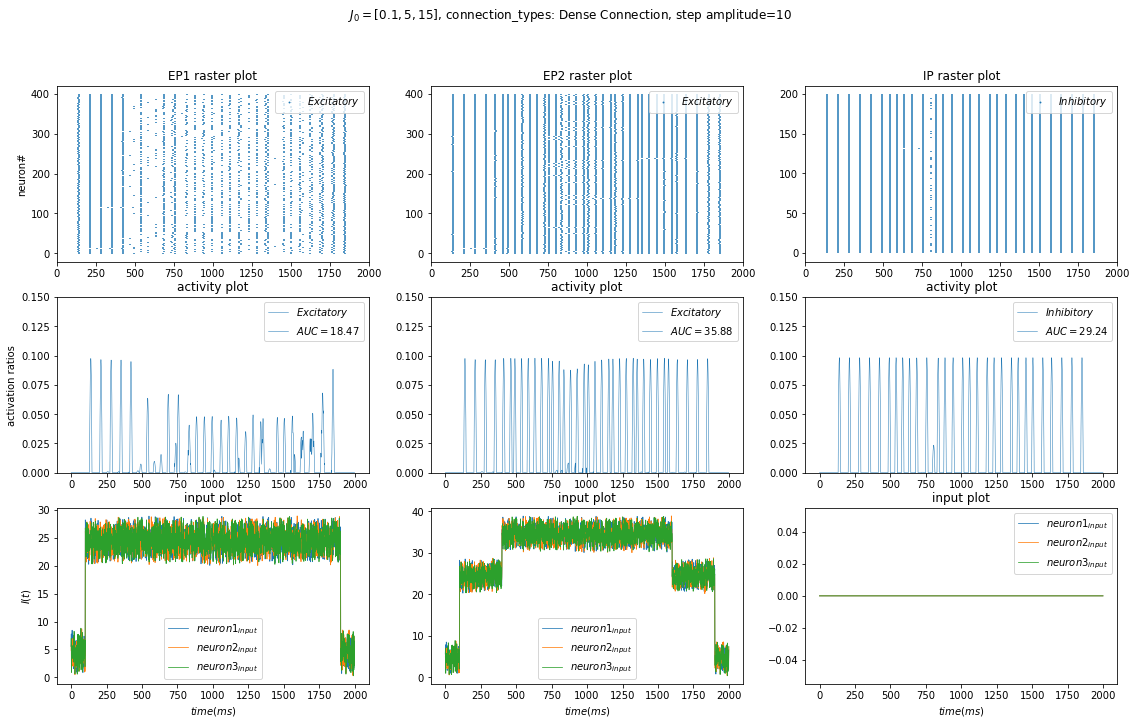

In [4]:
step_amplitude = 10
m1, m2, m3 = run_decision_simulation(
    connection_types=connection_types,
    j0=j0, step_amplitude=step_amplitude,
)

title = "$J_0 = {}$, connection_types: {}, step amplitude={}"\
    .format(j0, "Dense Connection", step_amplitude)
monitor_names = ['EP1 raster plot', 'EP2 raster plot', 'IP raster plot']
draw_decision_plots([m1, m2, m3], monitor_names=monitor_names,
                    figsize=fig_size, event_plot=True, title=title)

The activity of EP1 decreases after applying the additional step current,
and activity of EP2 and IP increases. This is due to effective inhibition;
The additional input increases EP1's activation. The increased activation of EP2
increases the activation of IP, this in turn, reduces the activity of both
EP1 and EP2, but it cannot fully diminish the effect of additional input on
EP2.

Now we increase the step current's amplitude to 20 and 30.

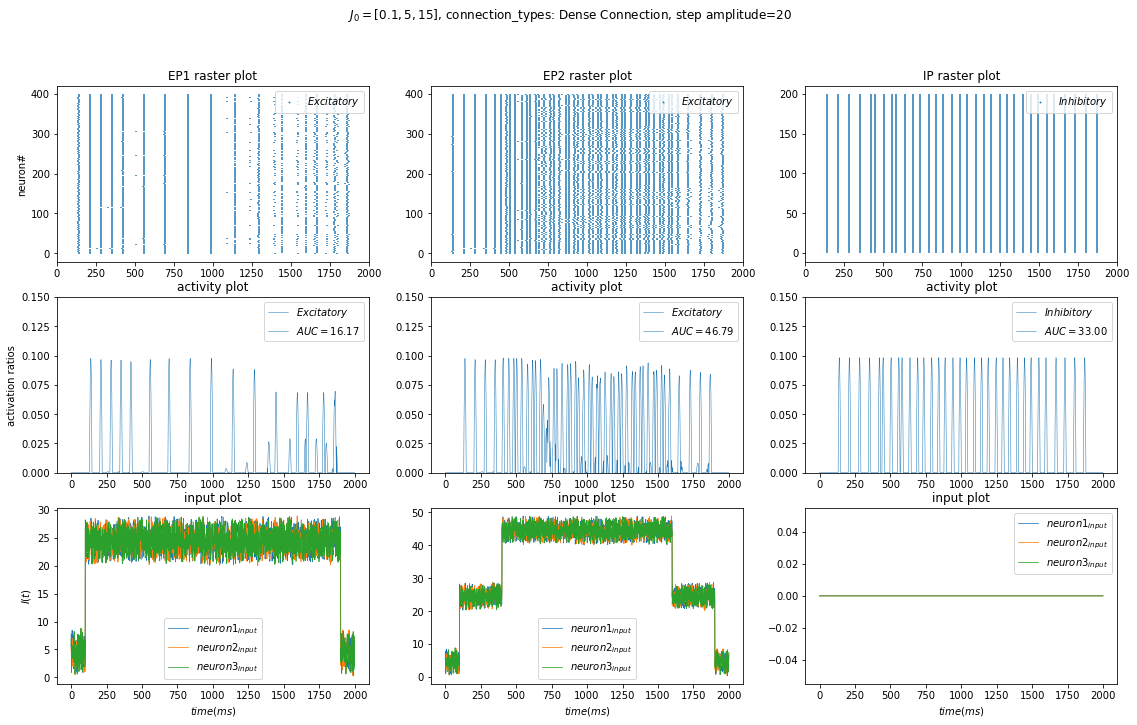

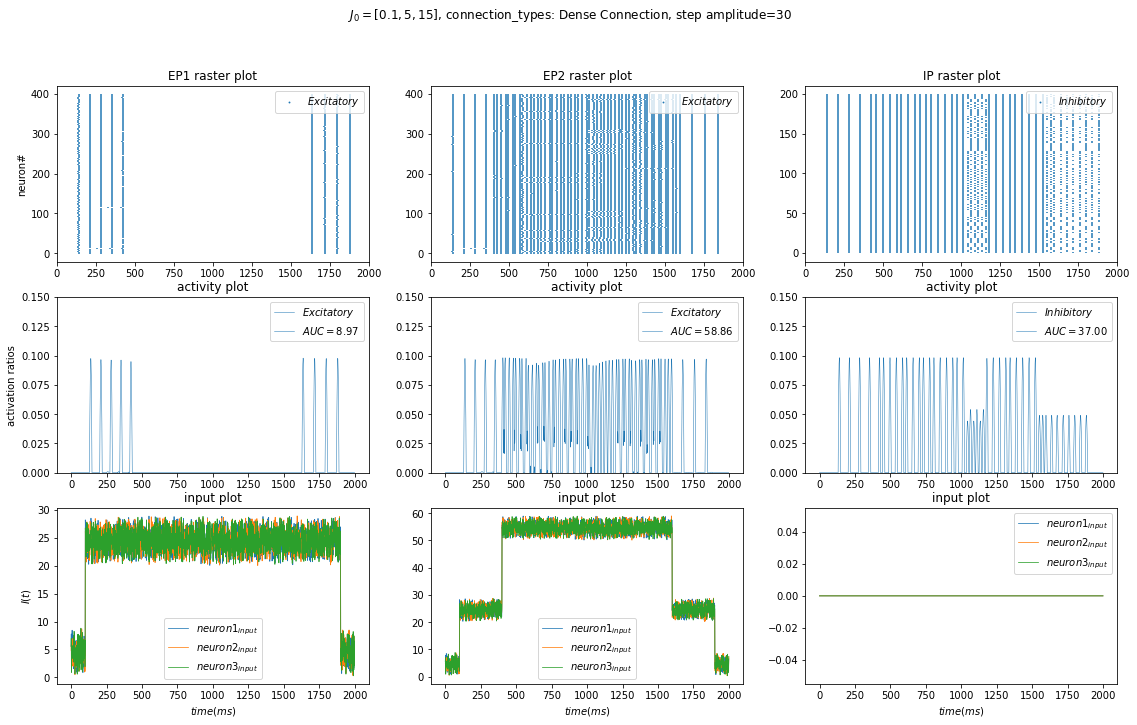

In [5]:
step_amplitudes = [20, 30]
for amp in step_amplitudes:
    m1, m2, m3 = run_decision_simulation(
        connection_types=connection_types,
        j0=j0, step_amplitude=amp,
    )

    title = "$J_0 = {}$, connection_types: {}, step amplitude={}"\
        .format(j0, "Dense Connection", amp)
    monitor_names = ['EP1 raster plot', 'EP2 raster plot', 'IP raster plot']
    draw_decision_plots([m1, m2, m3], monitor_names=monitor_names,
                        figsize=fig_size, event_plot=True, title=title)

The more the additional current, the activation of EP1 will be decreased more,
until at some point it stops being active due to enormous amount of inhibition
it receives from the inhibitory population.

### Linear inputs

We apply different types of additional inputs to the second excitatory population
to see the difference in the activity patterns.

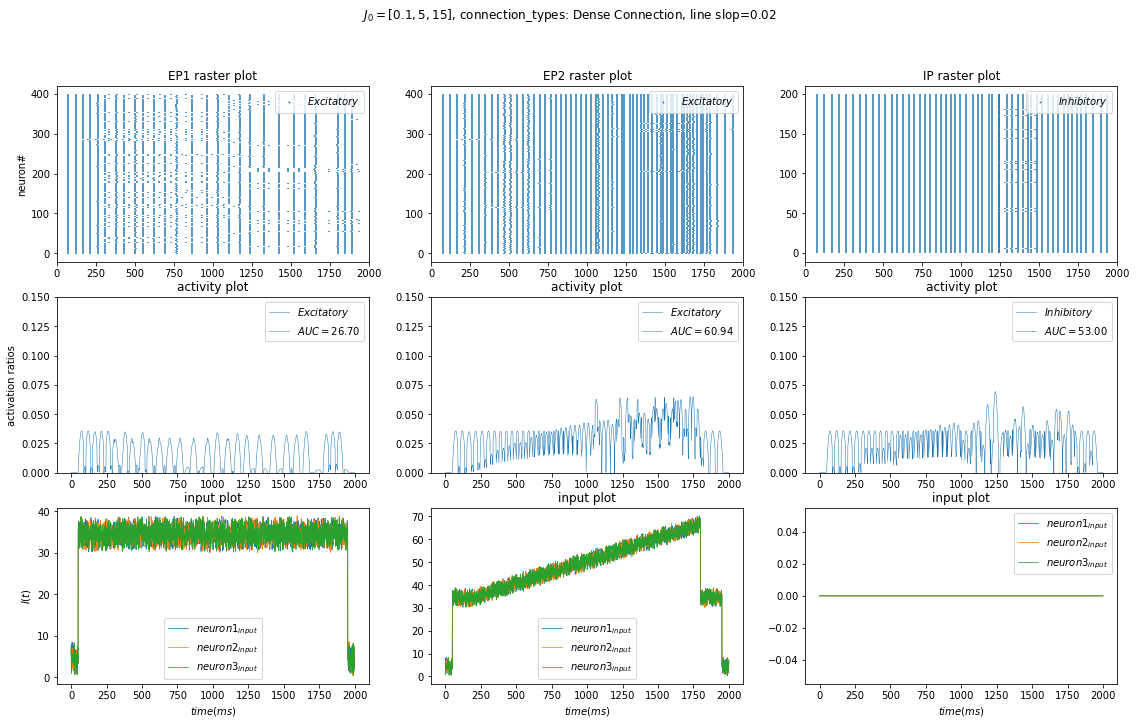

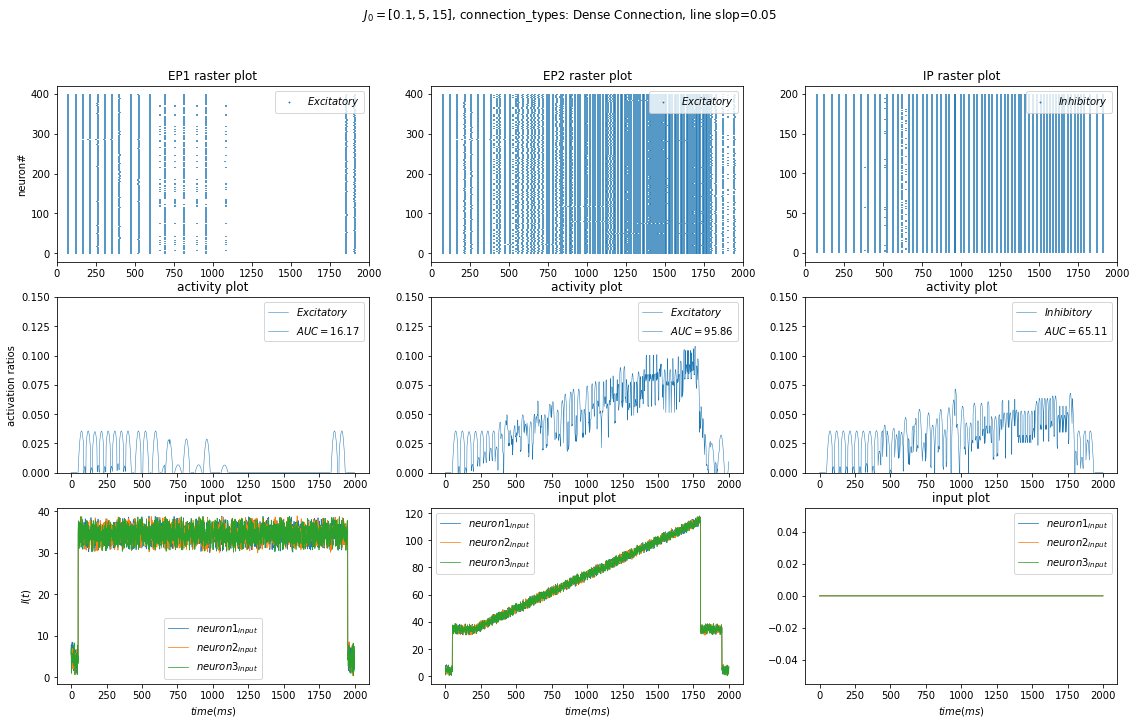

In [6]:
line_slopes = [0.02, 0.05]
for slope in line_slopes:
    m1, m2, m3 = run_decision_simulation(
        connection_types=connection_types,
        j0=j0, line_slop=slope, zero_time=100, input_base_value=30
    )

    title = "$J_0 = {}$, connection_types: {}, line slop={}"\
        .format(j0, "Dense Connection", slope)
    monitor_names = ['EP1 raster plot', 'EP2 raster plot', 'IP raster plot']
    draw_decision_plots([m1, m2, m3], monitor_names=monitor_names,
                        figsize=fig_size, event_plot=True, title=title,
                        smooth_size=63)

### Sinusoidal inputs
Now, we apply additional sine waves to the second excitatory population.

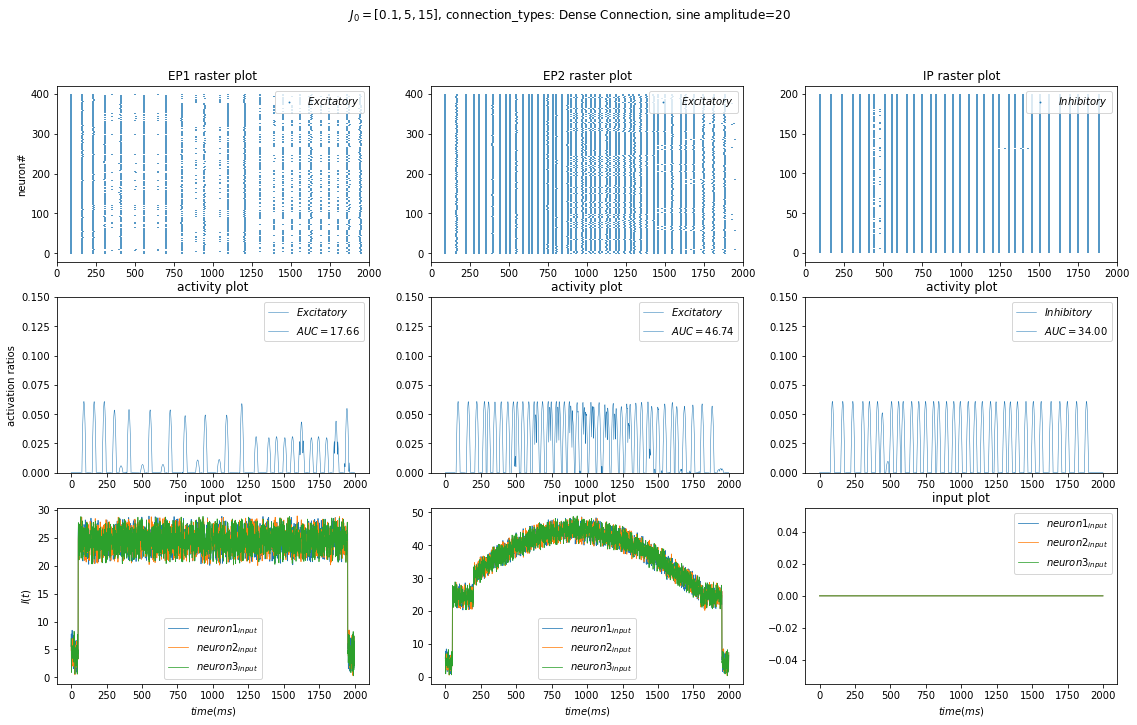

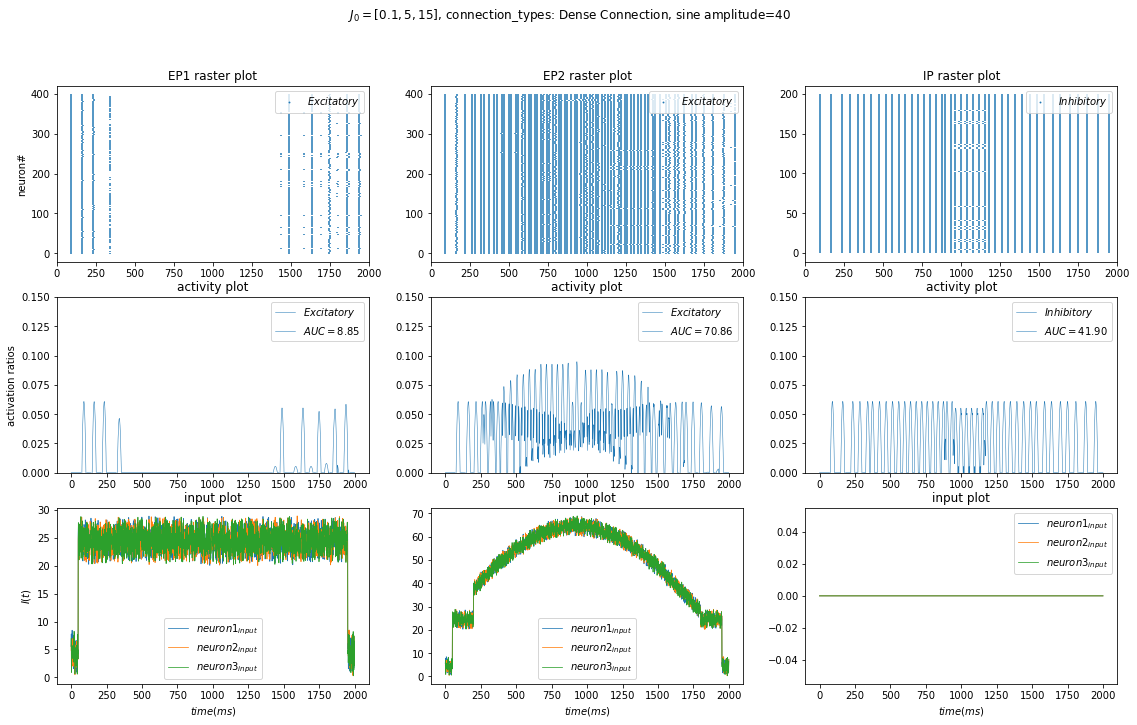

In [7]:
sine_amplitudes = [20, 40]
for amp in sine_amplitudes:
    m1, m2, m3 = run_decision_simulation(
        connection_types=connection_types,
        j0=j0, sine_amplitude=amp, sine_freq=0.17, zero_time=100
    )

    title = "$J_0 = {}$, connection_types: {}, sine amplitude={}"\
        .format(j0, "Dense Connection", amp)
    monitor_names = ['EP1 raster plot', 'EP2 raster plot', 'IP raster plot']
    draw_decision_plots([m1, m2, m3], monitor_names=monitor_names,
                        figsize=fig_size, event_plot=True, title=title,
                        smooth_size=37)

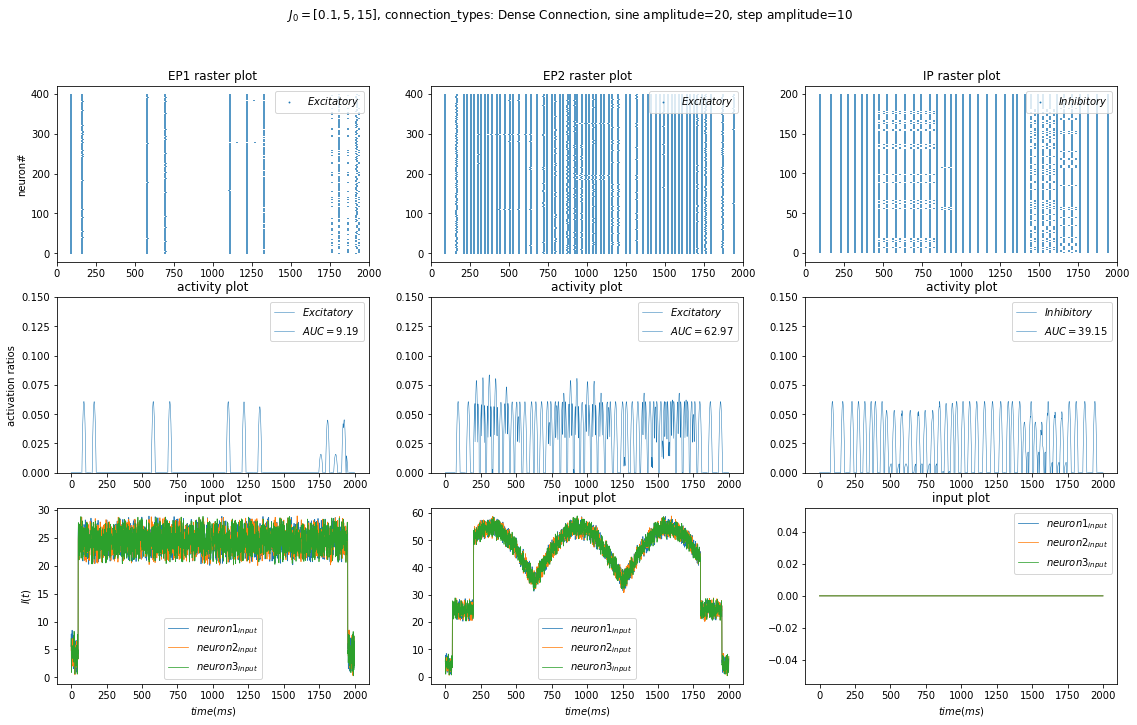

In [8]:
m1, m2, m3 = run_decision_simulation(
    connection_types=connection_types,
    j0=j0, sine_amplitude=20, sine_freq=0.5, zero_time=100, sine_abs=True,
    step_amplitude=10
)

title = "$J_0 = {}$, connection_types: {}, sine amplitude={}, step amplitude={}"\
    .format(j0, "Dense Connection", 20, 10)
monitor_names = ['EP1 raster plot', 'EP2 raster plot', 'IP raster plot']
draw_decision_plots([m1, m2, m3], monitor_names=monitor_names,
                    figsize=fig_size, event_plot=True, title=title,
                    smooth_size=37)



As we see, EP2's activation plot shape, follows the trend of
its input. EP1's activation plot on the other hand, is, in some sense,
 the complement of EP2's activation plot.

## Experiment #2

### Effect of $J_0$
Here we repeat the previous experiment with only different values of $j_0$.
We know from the previous project that if we increase the value of $j_0$,
the connection becomes stronger.

We fix the inputs to a stepped sine wave to focus on effects of $J_0$s.

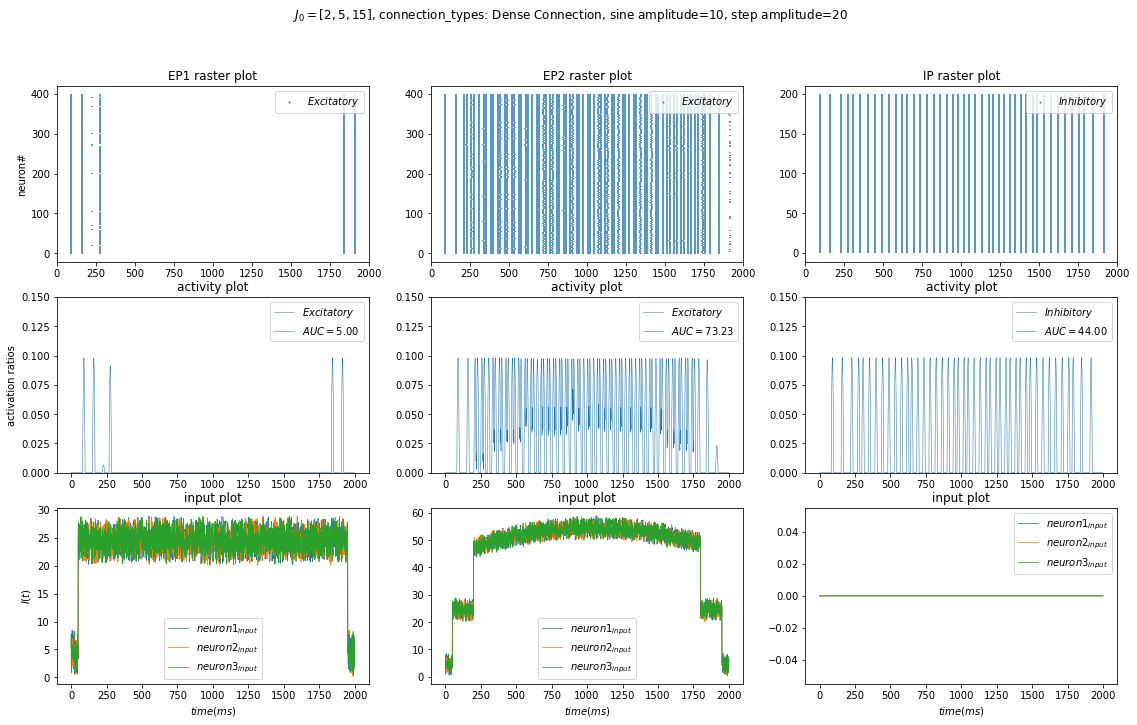

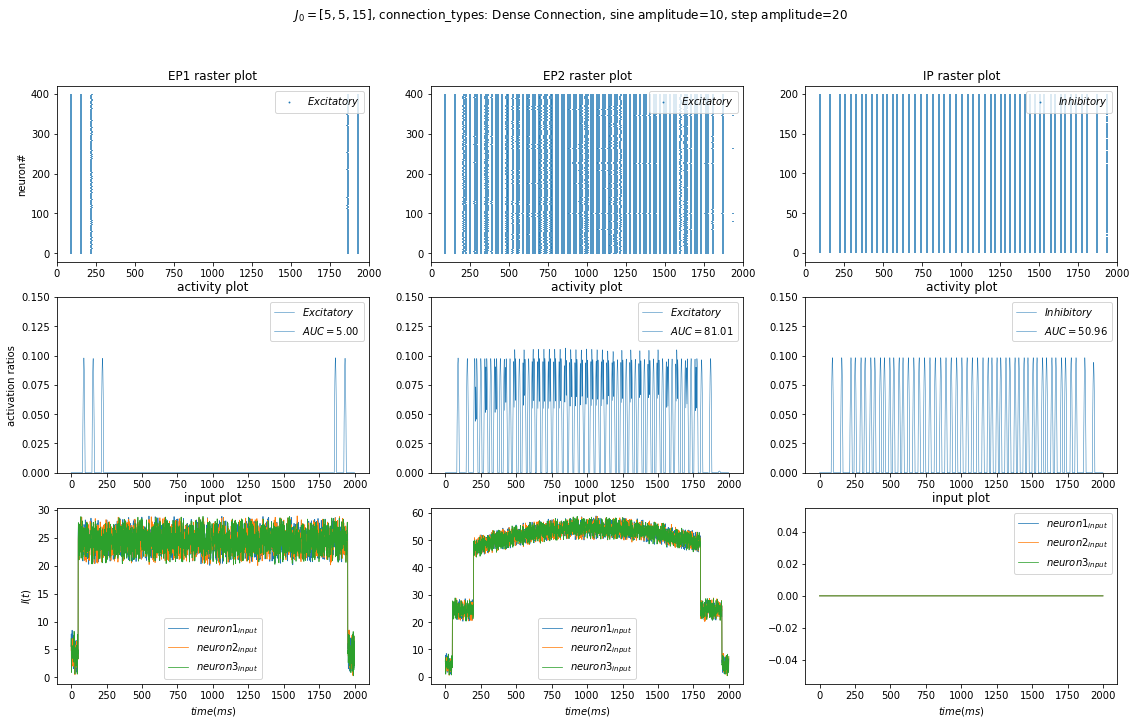

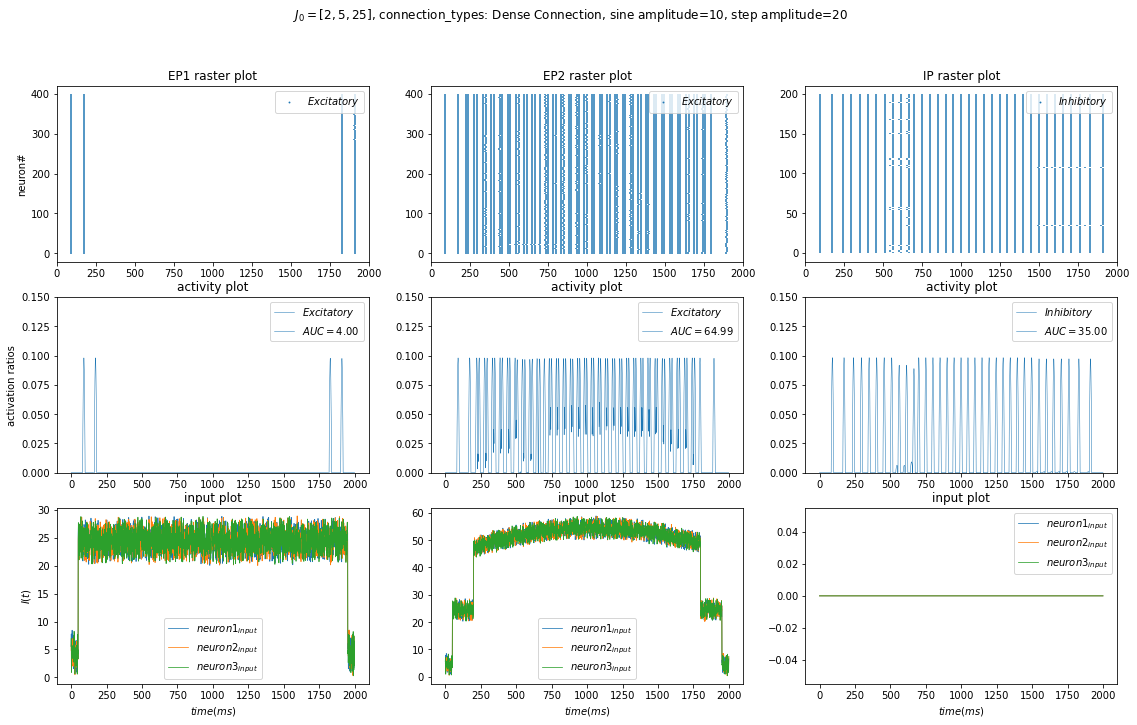

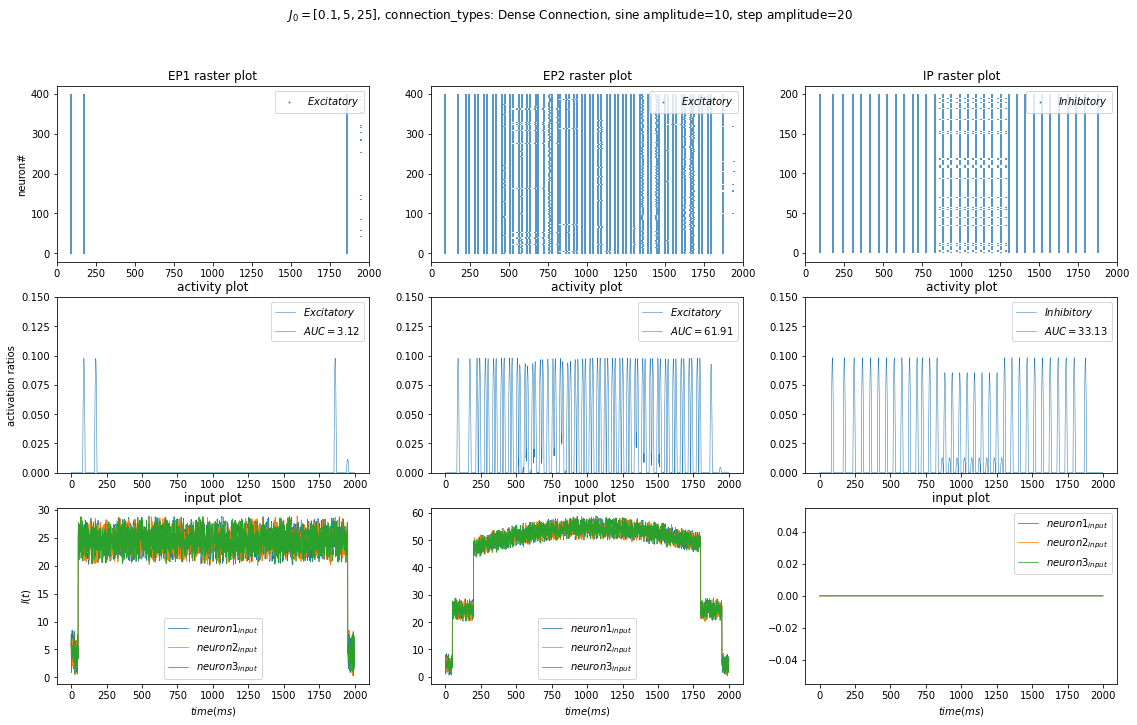

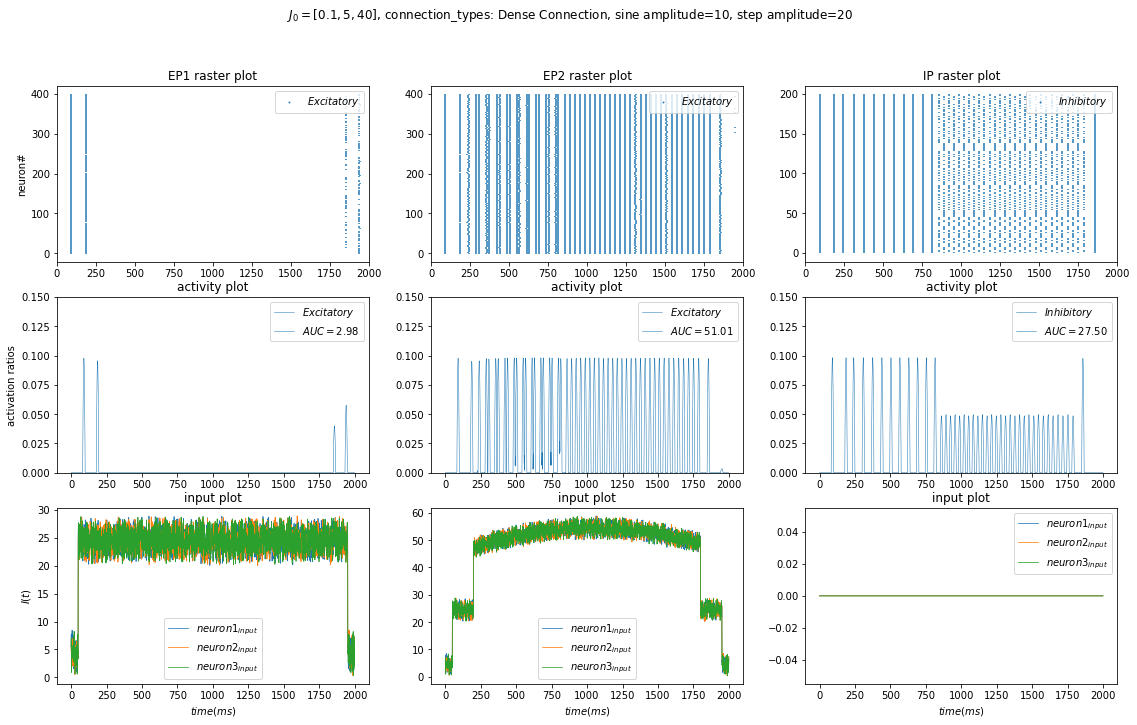

In [9]:
connection_types = [DenseConnection, DenseConnection, DenseConnection]
j0s = [[2, 5, 15] ,[5, 5, 15], [2, 5, 25], [0.1, 5, 25], [0.1, 5, 40]]
for j0 in j0s:
    m1, m2, m3 = run_decision_simulation(
        connection_types=connection_types,
        j0=j0, sine_amplitude=10, sine_freq=0.15, zero_time=100, sine_abs=True,
        step_amplitude=20
    )
    title = "$J_0 = {}$, connection_types: {}, sine amplitude={}, step amplitude={}"\
        .format(j0, "Dense Connection", 10, 20)
    draw_decision_plots([m1, m2, m3], monitor_names=monitor_names,
                        figsize=fig_size, event_plot=True, title=title)

The overall activation pattern of the populations are preserved with changing
the values of $j_0$ in a normal range (which do not cause exploding activities).
The effect of this parameter is as just we talked about in the previous project.

## Experiment #3

Testing the effect of different connection schemes.

### EE connection type -> Random

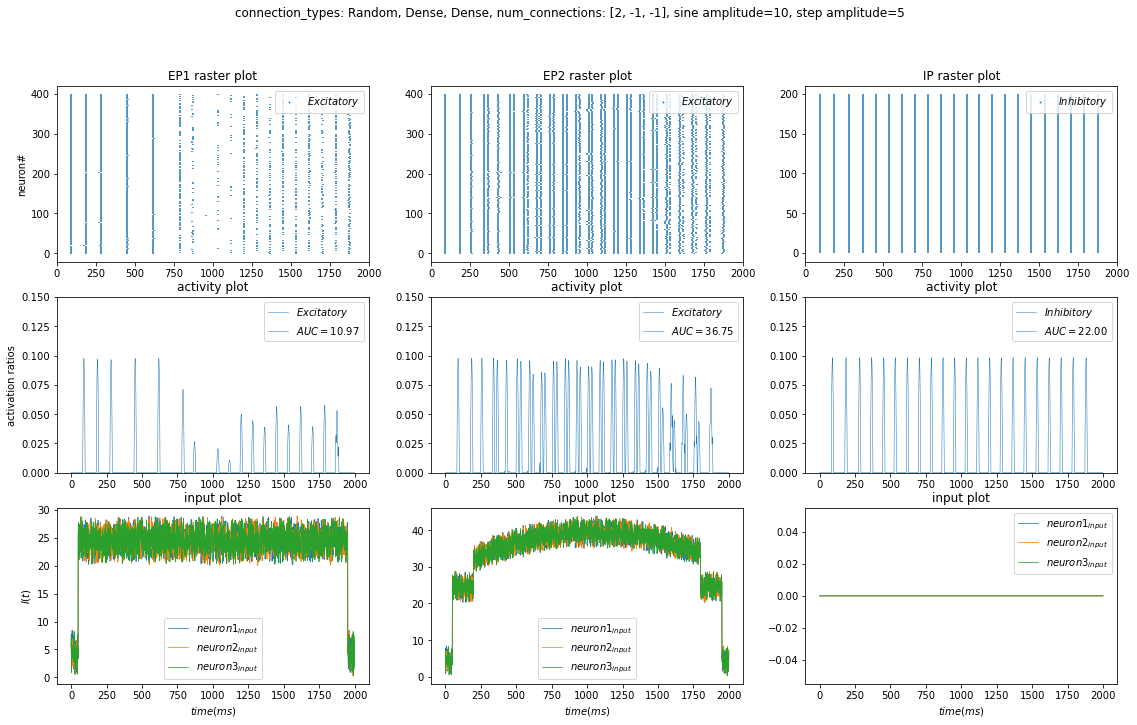

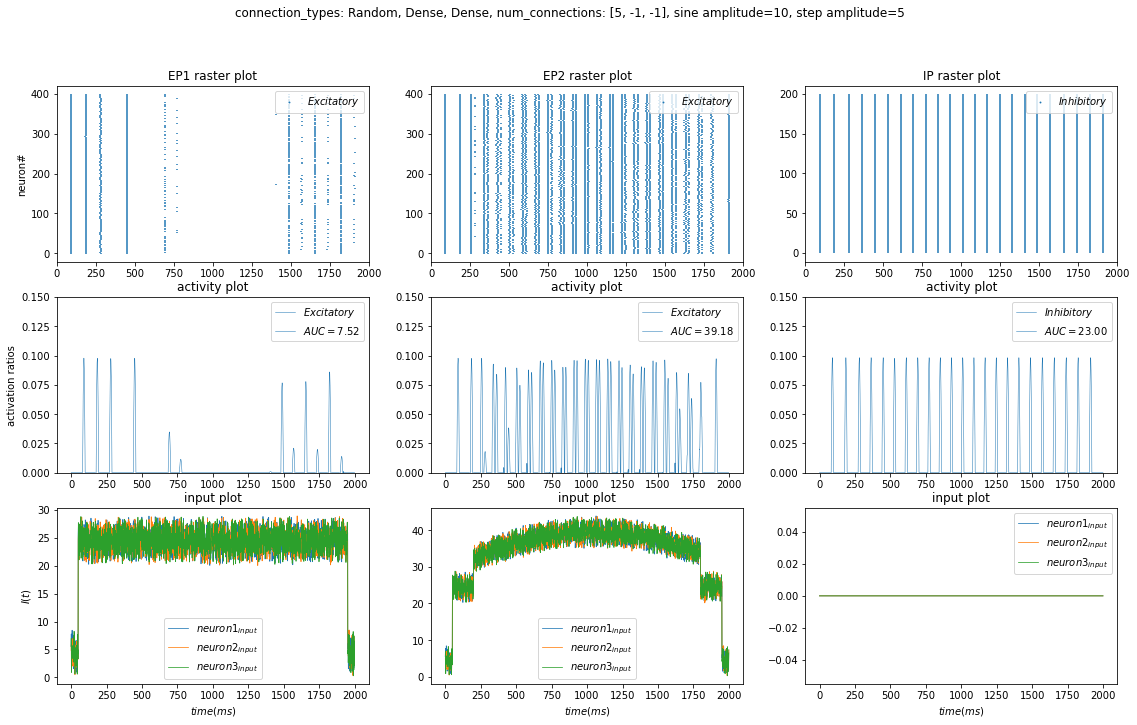

In [10]:
connection_types = [RandomConnection, DenseConnection, DenseConnection]
num_connections = [[2, -1, -1], [5, -1, -1],]
for num_connection in num_connections:
    m1, m2, m3 = run_decision_simulation(
        connection_types=connection_types, num_connections=num_connection,
        j0=j0, sine_amplitude=10, sine_freq=0.15, zero_time=100,
        step_amplitude=5
    )
    title = "connection_types: {}, num_connections: {}, sine amplitude={}, step amplitude={}"\
        .format("Random, Dense, Dense", num_connection, 10, 5)
    draw_decision_plots([m1, m2, m3], monitor_names=monitor_names,
                        figsize=fig_size, event_plot=True, title=title)


### EE and EI connection type -> Random

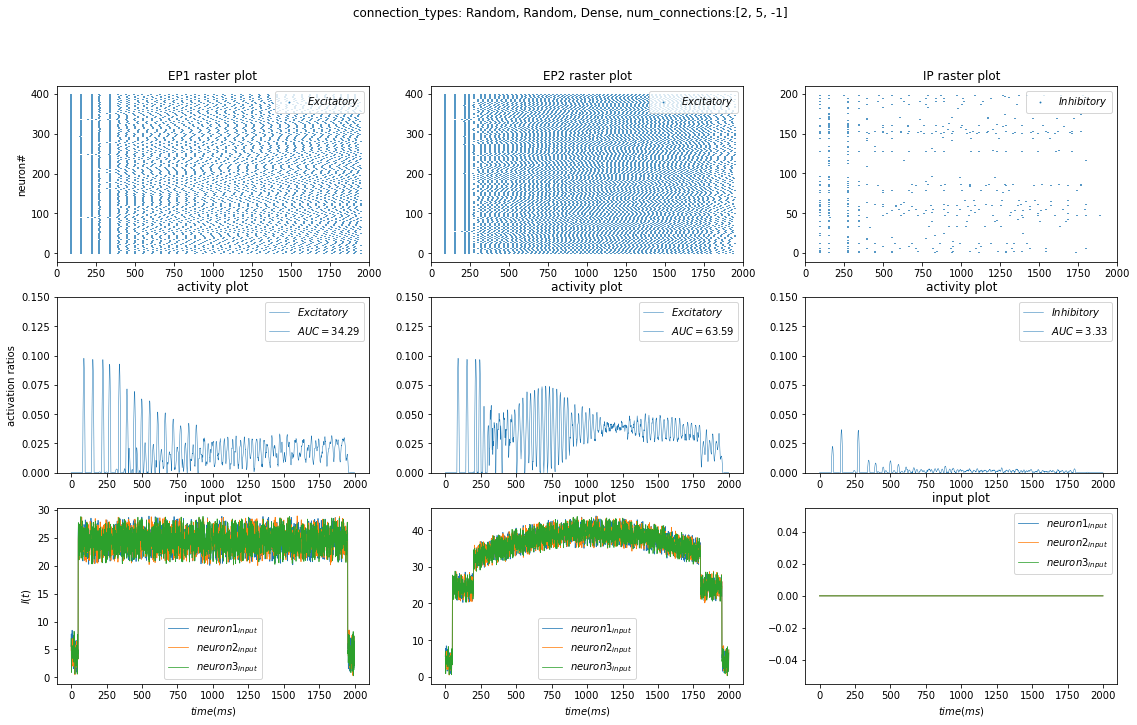

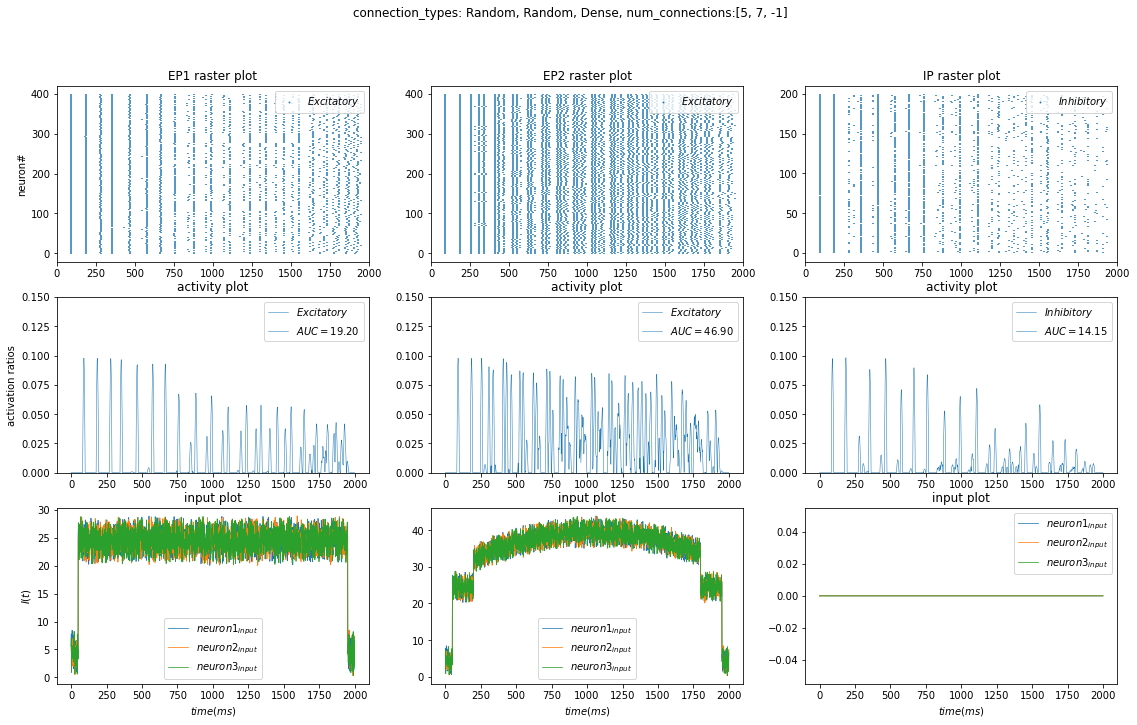

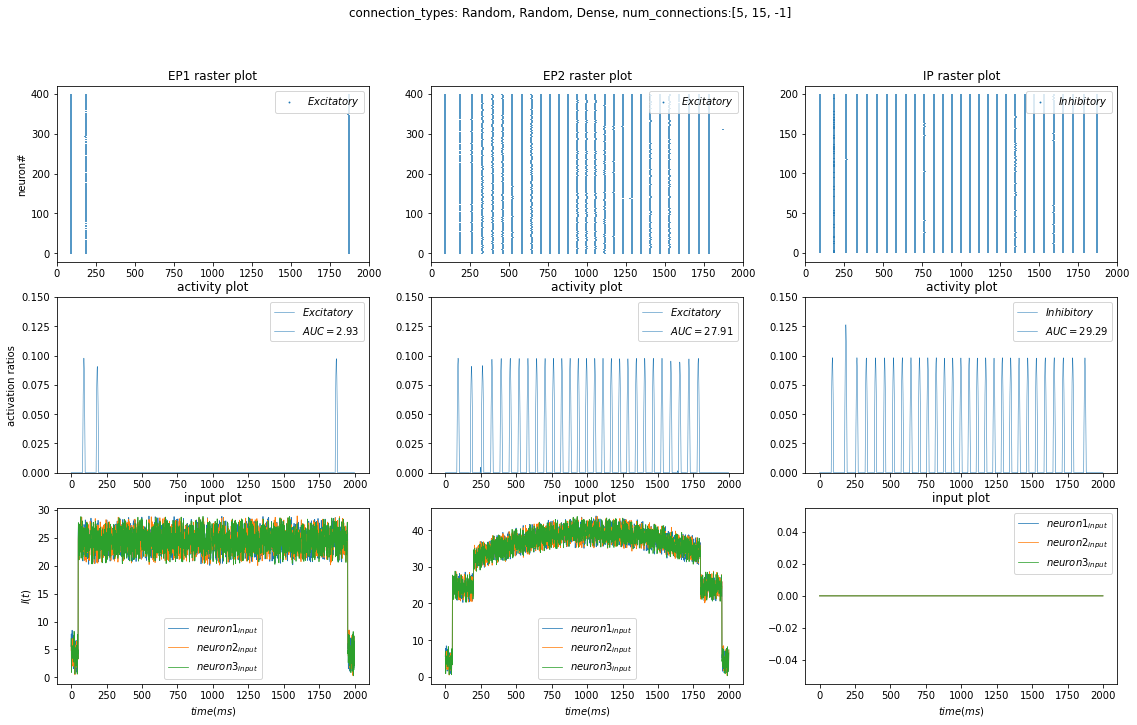

In [11]:
connection_types = [RandomConnection, RandomConnection, DenseConnection]
num_connections = [[2, 5, -1], [5, 7, -1], [5, 15, -1]]
for num_connection in num_connections:
    m1, m2, m3 = run_decision_simulation(
        connection_types=connection_types, num_connections=num_connection,
        j0=j0, sine_amplitude=10, sine_freq=0.15, zero_time=100,
        step_amplitude=5
    )
    title = "connection_types: {}, num_connections:{}"\
        .format("Random, Random, Dense", num_connection)
    draw_decision_plots([m1, m2, m3], monitor_names=monitor_names,
                        figsize=fig_size, event_plot=True, title=title)


We see that by increasing the strength of the EI connections, the inhibitory
population significantly affects the activities of both EPs. In some point,
the inhibitory population can stop EP1 activity altogether.

### All connection types -> Random

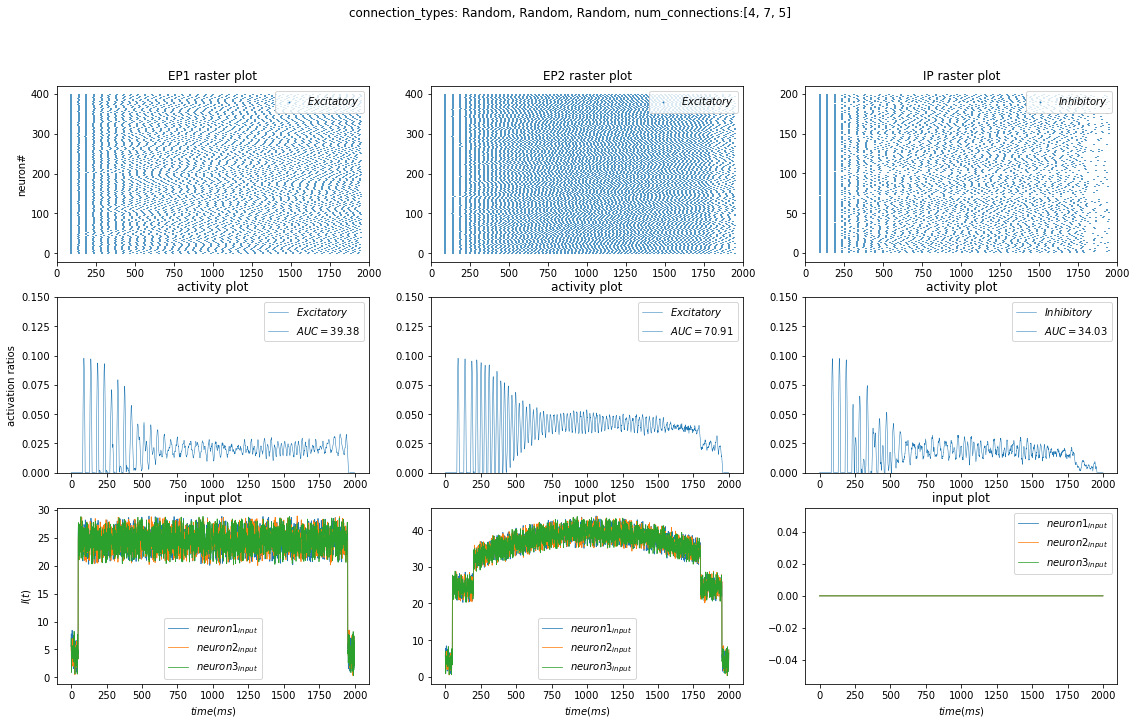

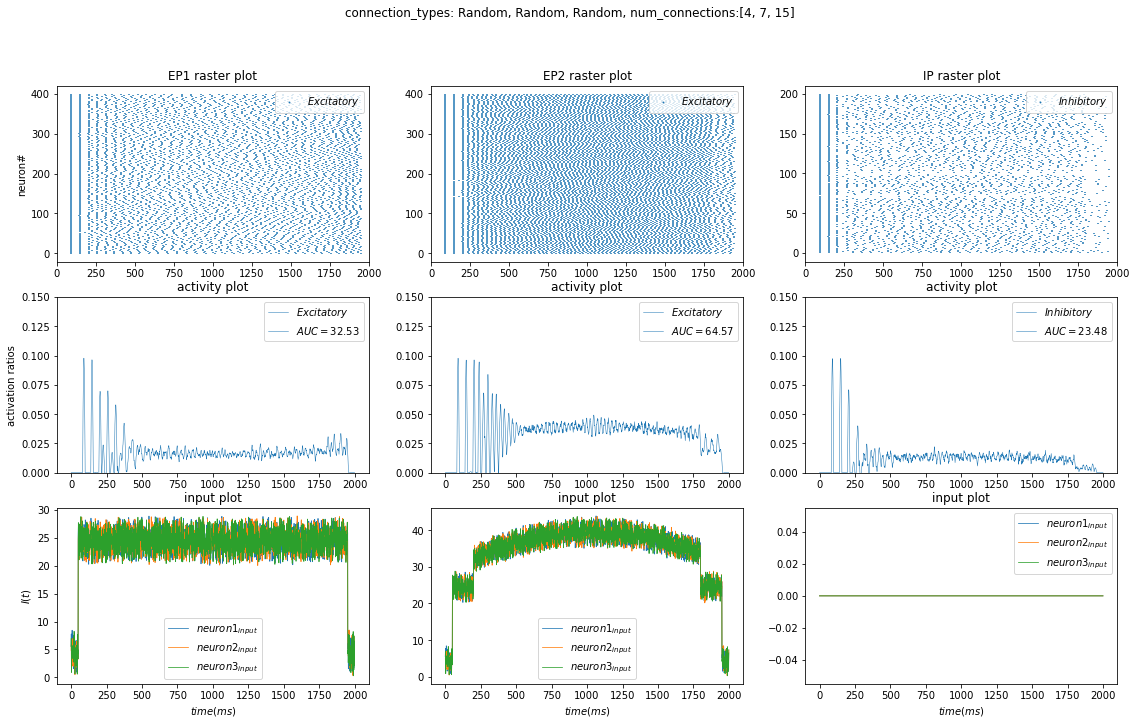

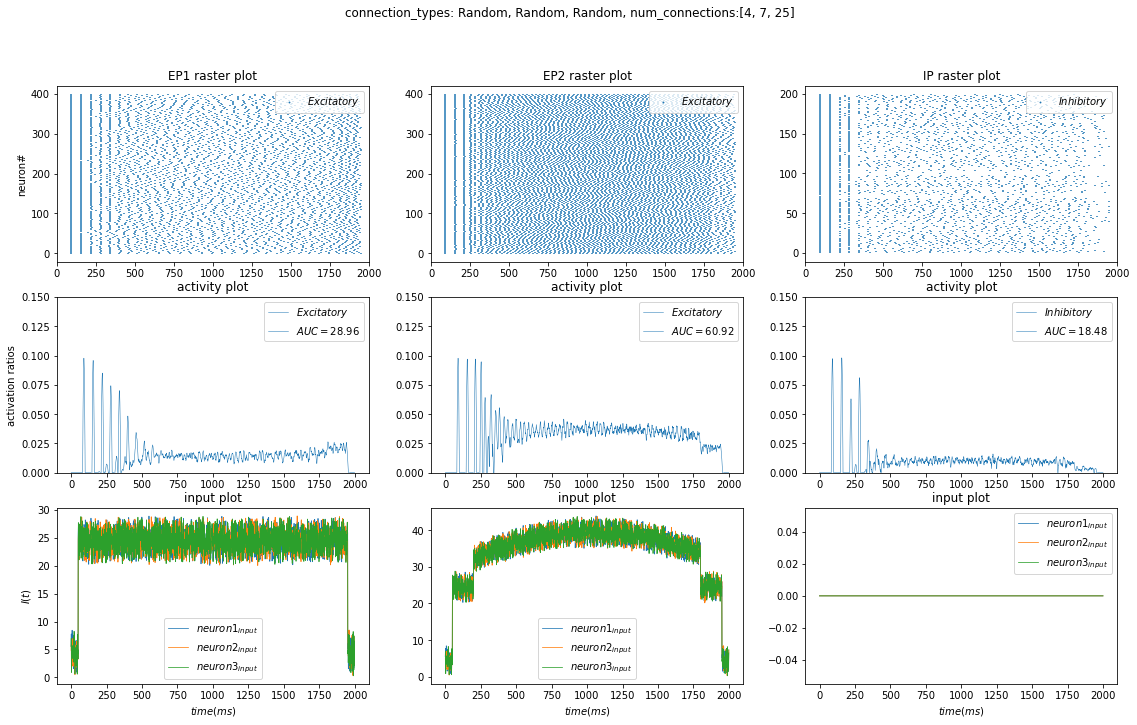

In [12]:
connection_types = [RandomConnection, RandomConnection, RandomConnection]
num_connections = [[4, 7, 5], [4, 7, 15], [4, 7, 25]]
for num_connection in num_connections:
    m1, m2, m3 = run_decision_simulation(
        connection_types=connection_types, num_connections=num_connection,
        j0=j0, sine_amplitude=10, sine_freq=0.15, zero_time=100,
        step_amplitude=5
    )
    title = "connection_types: {}, num_connections:{}"\
        .format("Random, Random, Random", num_connection)
    draw_decision_plots([m1, m2, m3], monitor_names=monitor_names,
                        figsize=fig_size, event_plot=True, title=title)

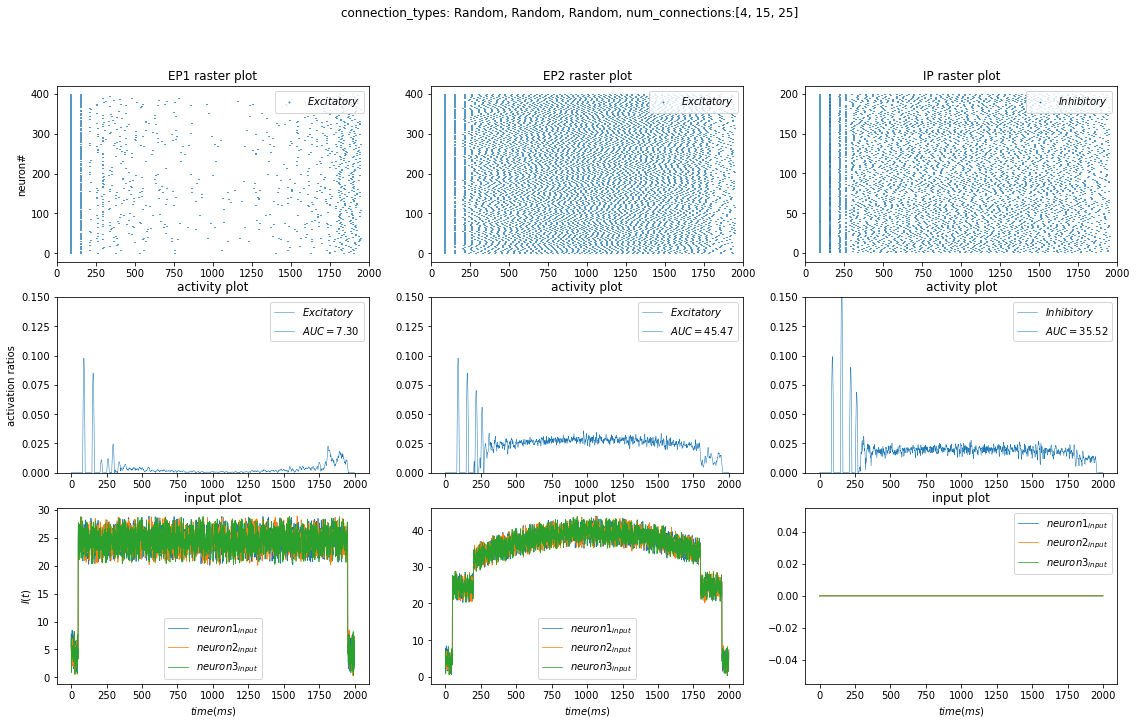

In [13]:
num_connections = [[4, 15, 25]]
for num_connection in num_connections:
    m1, m2, m3 = run_decision_simulation(
        connection_types=connection_types, num_connections=num_connection,
        j0=j0, sine_amplitude=10, sine_freq=0.15, zero_time=100,
        step_amplitude=5
    )
    title = "connection_types: {}, num_connections:{}"\
        .format("Random, Random, Random", num_connection)
    draw_decision_plots([m1, m2, m3], monitor_names=monitor_names,
                        figsize=fig_size, event_plot=True, title=title)

By observing the above plots, the difference between increasing the strength of
IE connections and EI connections is visible. Increasing the strength of IE will
not change things very much after some point, this is because this change decreases
the whole system's activity consistently. But strengthening EI connections
affects the excitatory population with lower input more than the other one.
It could be explained more in this way: EI connections will be more powerful
when the excitatory populations are more active; regardless of the EPs inputs,
IP affects both EPs in the same way, if activity of one of them increases,
the IP's suppression will be more intense. This intensity will diminish the
EP1 activity but cannot fully overcome the activity of EP2. It seems like EP2
is directly inhibiting the activation of EP1.

With these results, we now know that we can leverage number of IE connections in
order to control the system in a consistent way.

### IE and EI connection type -> Random

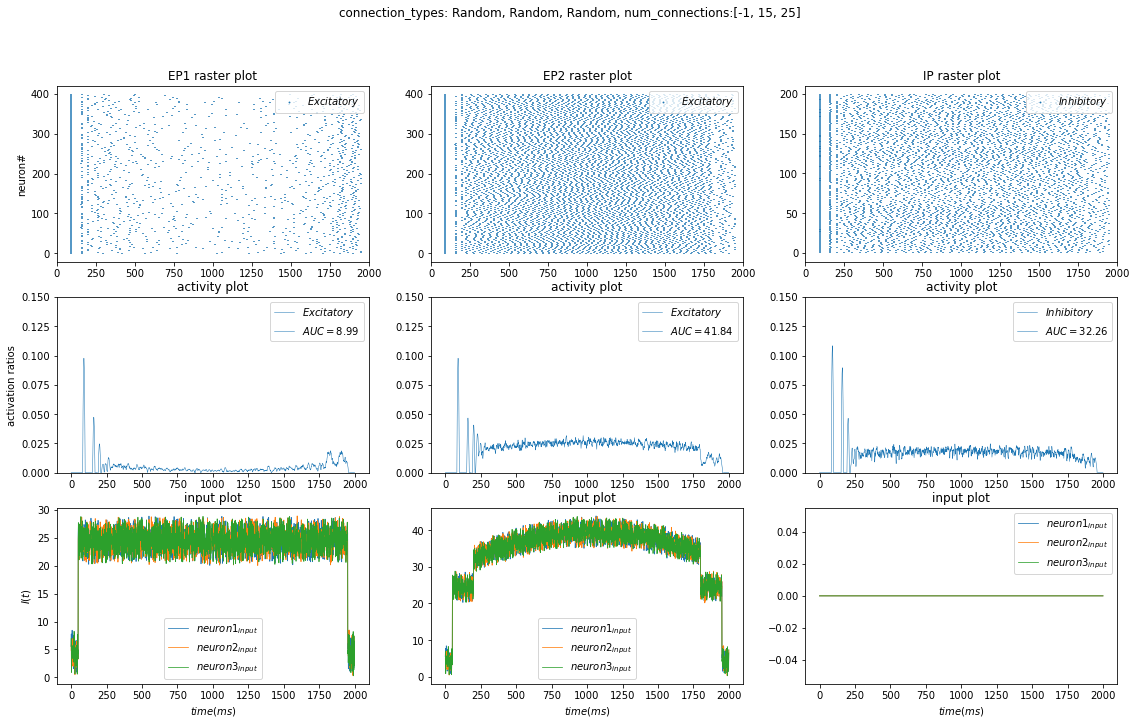

In [14]:
num_connections = [[-1, 15, 25]]
connection_types = [DenseConnection, RandomConnection, RandomConnection]
for num_connection in num_connections:
    m1, m2, m3 = run_decision_simulation(
        connection_types=connection_types, num_connections=num_connection,
        j0=j0, sine_amplitude=10, sine_freq=0.15, zero_time=100,
        step_amplitude=5
    )
    title = "connection_types: {}, num_connections:{}"\
        .format("Random, Random, Random", num_connection)
    draw_decision_plots([m1, m2, m3], monitor_names=monitor_names,
                        figsize=fig_size, event_plot=True, title=title)

No big difference is observed with full random scheme. This suggests that
the internal connections of EPs do not have significant impact on the results.
Also, both EI and IE connections should be random in order to achieve results
different from all dense connections scheme.

## Experiment #4

In this experiment, we use random connection for all connections and test the
effect of different inputs on the system activity. This is repeating
experiment #1 but with random connections.

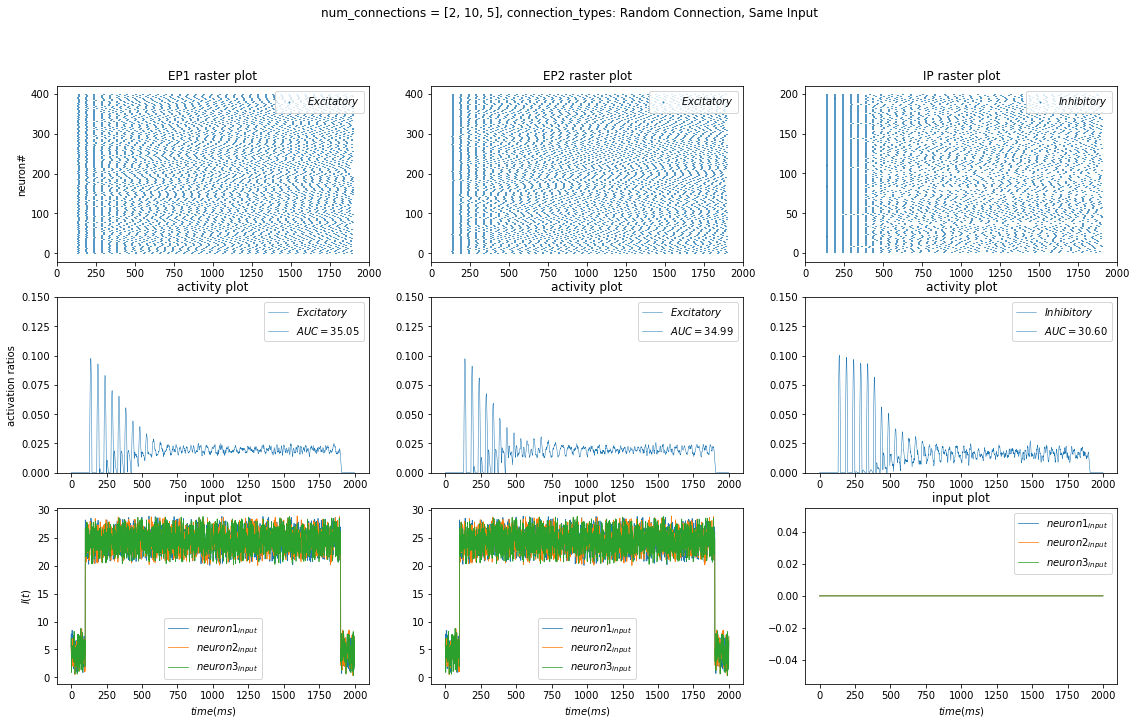

In [15]:
connection_types = [RandomConnection, RandomConnection, RandomConnection]
num_connections = [2, 10, 5]
m1, m2, m3 = run_decision_simulation(
    connection_types=connection_types,
    num_connections=num_connections
)

title = "num_connections = {}, connection_types: {}, Same Input".\
    format(num_connections, "Random Connection")
draw_decision_plots([m1, m2, m3], monitor_names=monitor_names,
                    figsize=fig_size, event_plot=True, title=title)

As expected, all populations have almost the same activity pattern.

Now we apply an additional step current with amplitudes of $15, 30, 75$
 to the second
excitatory population.

### Step inputs


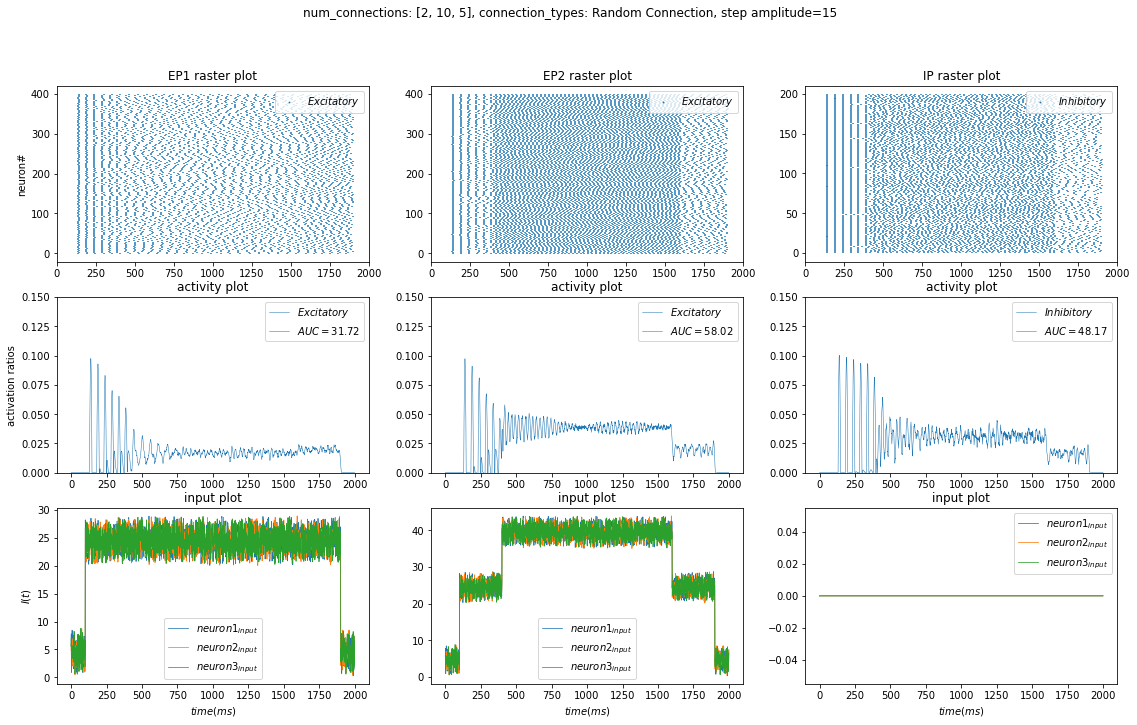

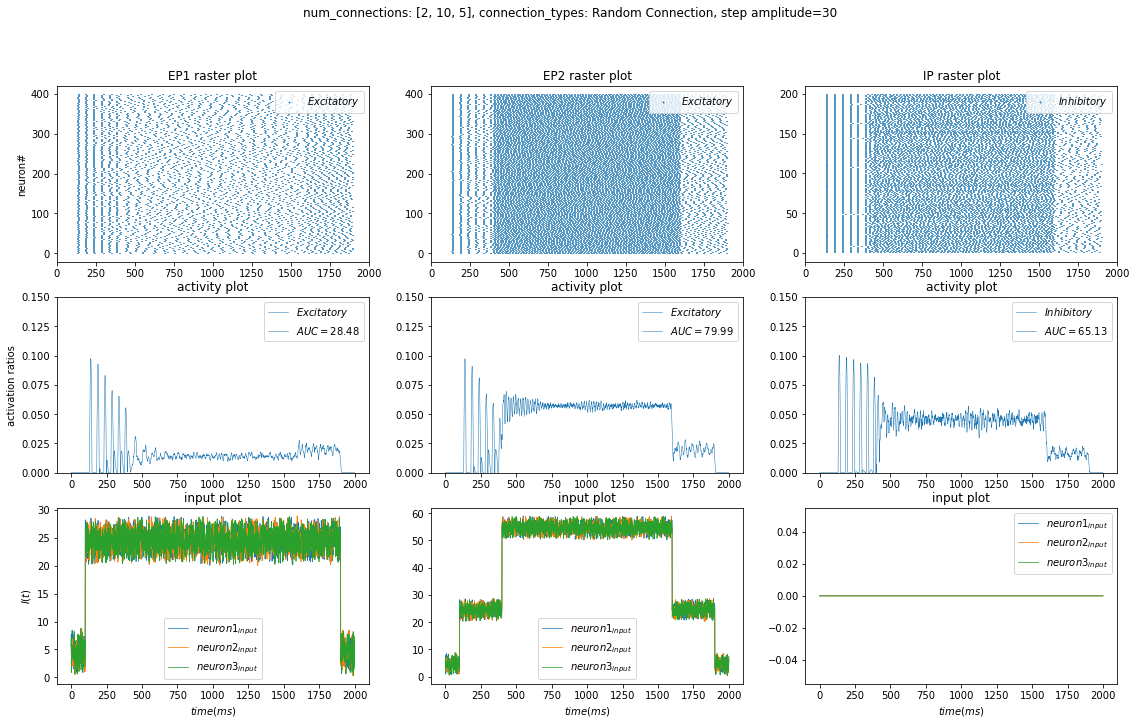

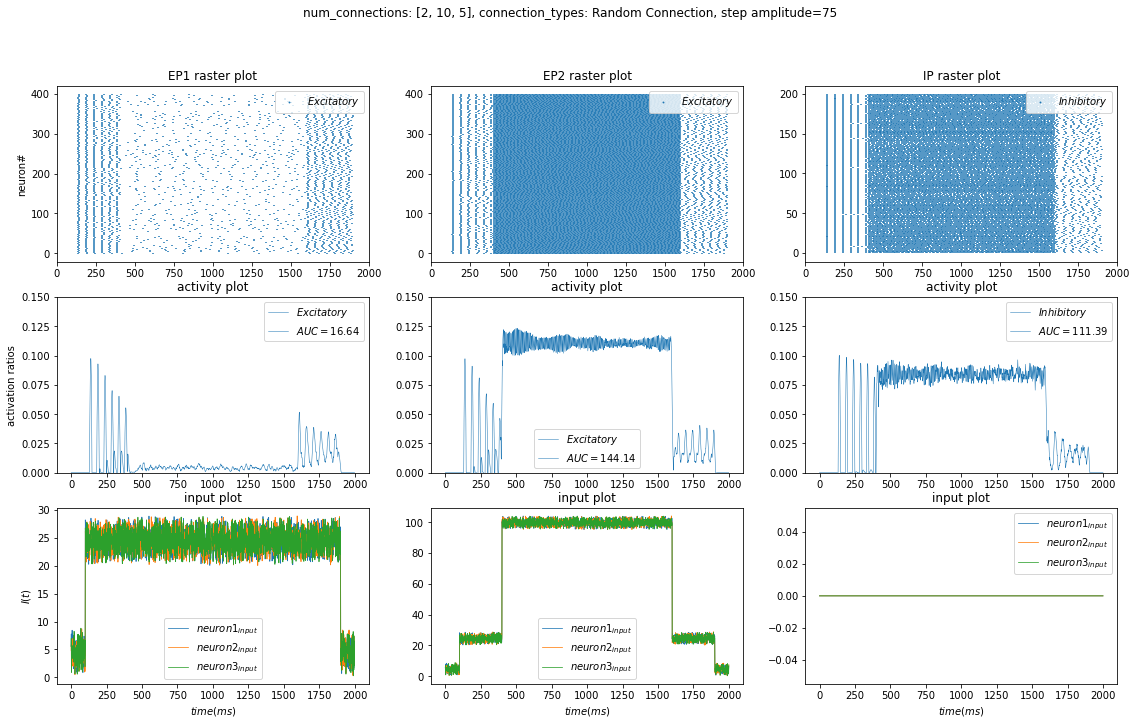

In [16]:
step_amplitudes = [15, 30, 75]
for amp in step_amplitudes:
    m1, m2, m3 = run_decision_simulation(
        connection_types=connection_types,
        num_connections=num_connections, step_amplitude=amp,
    )

    title = "num_connections: {}, connection_types: {}, step amplitude={}"\
        .format(num_connections, "Random Connection", amp)
    monitor_names = ['EP1 raster plot', 'EP2 raster plot', 'IP raster plot']
    draw_decision_plots([m1, m2, m3], monitor_names=monitor_names,
                        figsize=fig_size, event_plot=True, title=title)

The activity of EP1 decreases after applying the additional step current,
and activity of EP2 and IP increases. This is due to effective inhibition.
The increased activation of EP1 increases the activation of IP, this in turn,
reduces the activity of both
EP1 and EP2, but it cannot fully diminish the effect of additional input on
EP2.

The more the additional current, the activation of EP1 will be decreased more.
Unlike the situation with dense connection types, where EP1 would stop being active
with relatively low amount of increase in EP2, here it can resist more and even
though its activation decreases it is more robust to input change in the
other excitatory population.

### Linear inputs

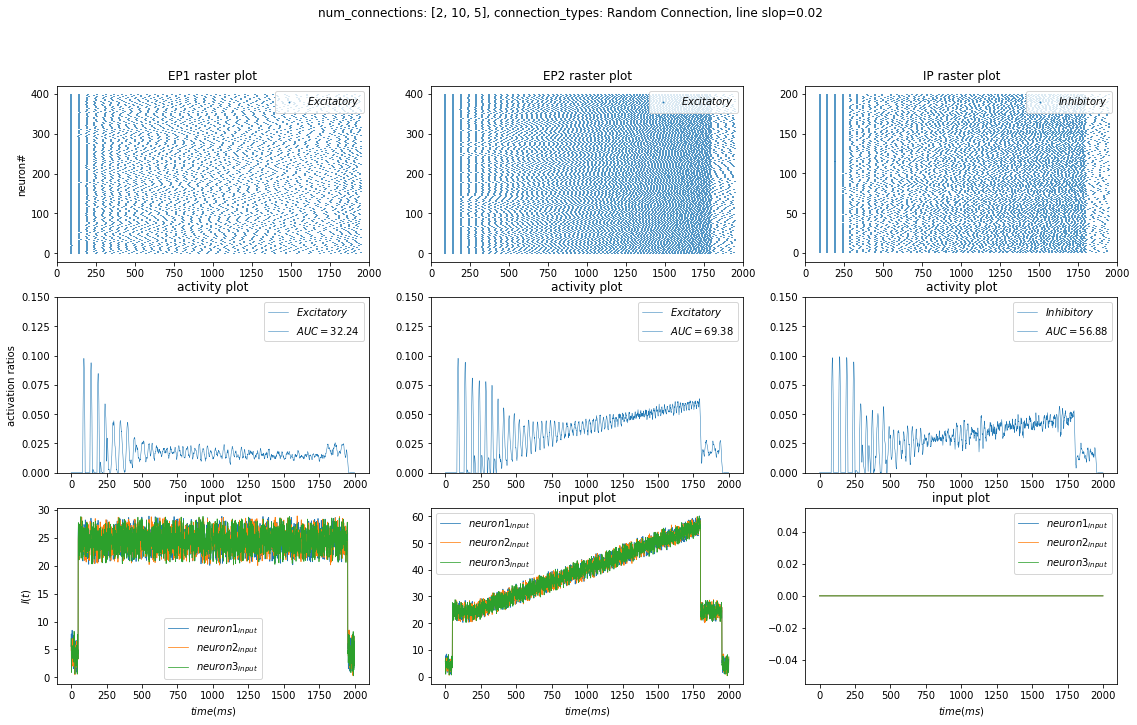

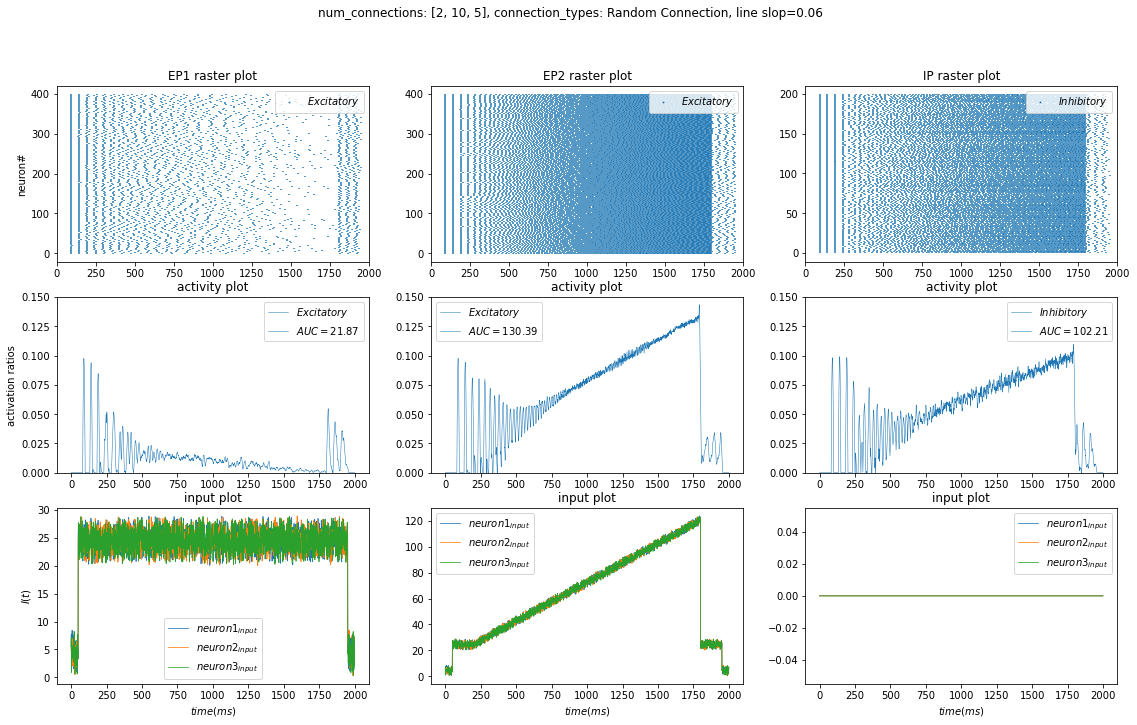

In [17]:
line_slopes = [0.02, 0.06]
for slope in line_slopes:
    m1, m2, m3 = run_decision_simulation(
        connection_types=connection_types,
        num_connections=num_connections, line_slop=slope, zero_time=100
    )

    title = "num_connections: {}, connection_types: {}, line slop={}"\
        .format(num_connections, "Random Connection", slope)
    monitor_names = ['EP1 raster plot', 'EP2 raster plot', 'IP raster plot']
    draw_decision_plots([m1, m2, m3], monitor_names=monitor_names,
                        figsize=fig_size, event_plot=True, title=title)


### Sinusoidal inputs
Now, we apply additional sine waves to the second excitatory population.

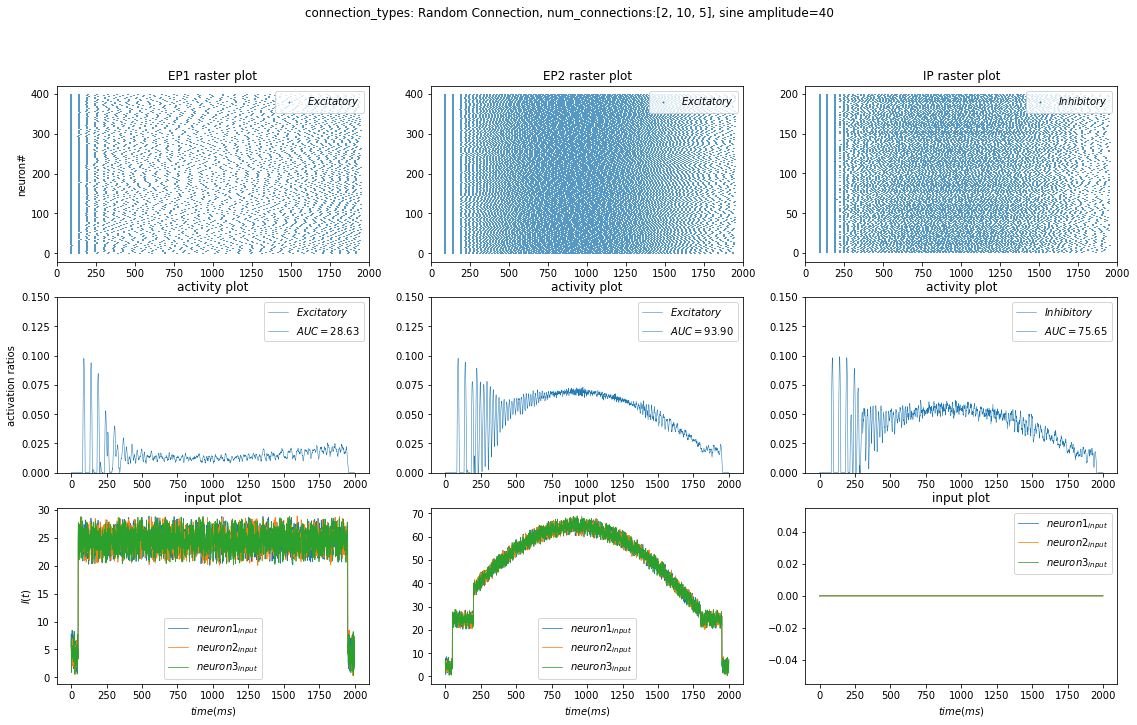

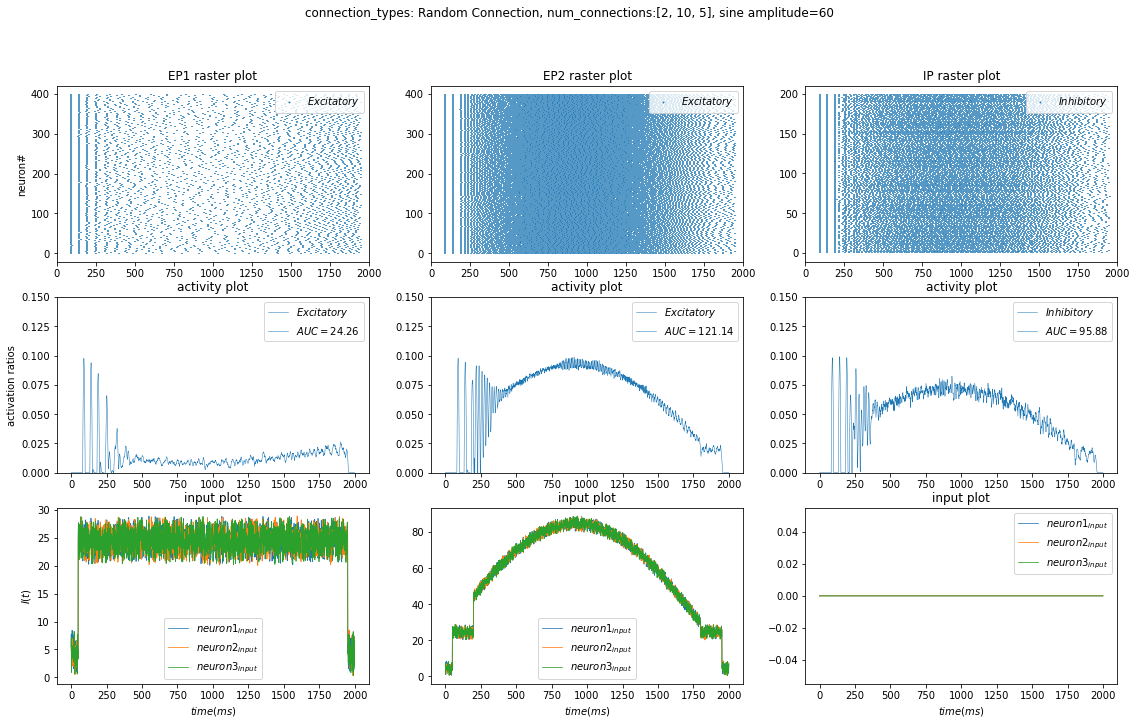

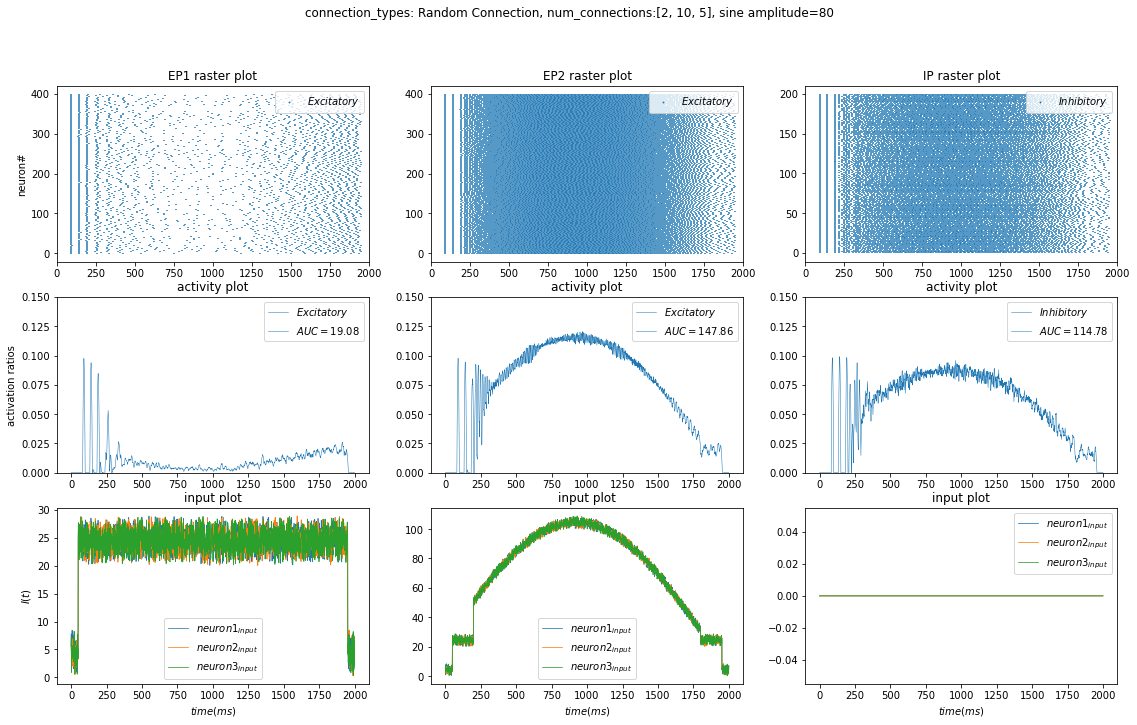

In [18]:
sine_amplitudes = [40, 60, 80]
for amp in sine_amplitudes:
    m1, m2, m3 = run_decision_simulation(
        connection_types=connection_types,
        num_connections=num_connections, sine_amplitude=amp, sine_freq=0.17, zero_time=100
    )

    title = "connection_types: {}, num_connections:{}, sine amplitude={}"\
    .format("Random Connection", num_connections, amp)
    monitor_names = ['EP1 raster plot', 'EP2 raster plot', 'IP raster plot']
    draw_decision_plots([m1, m2, m3], monitor_names=monitor_names,
                        figsize=fig_size, event_plot=True, title=title)

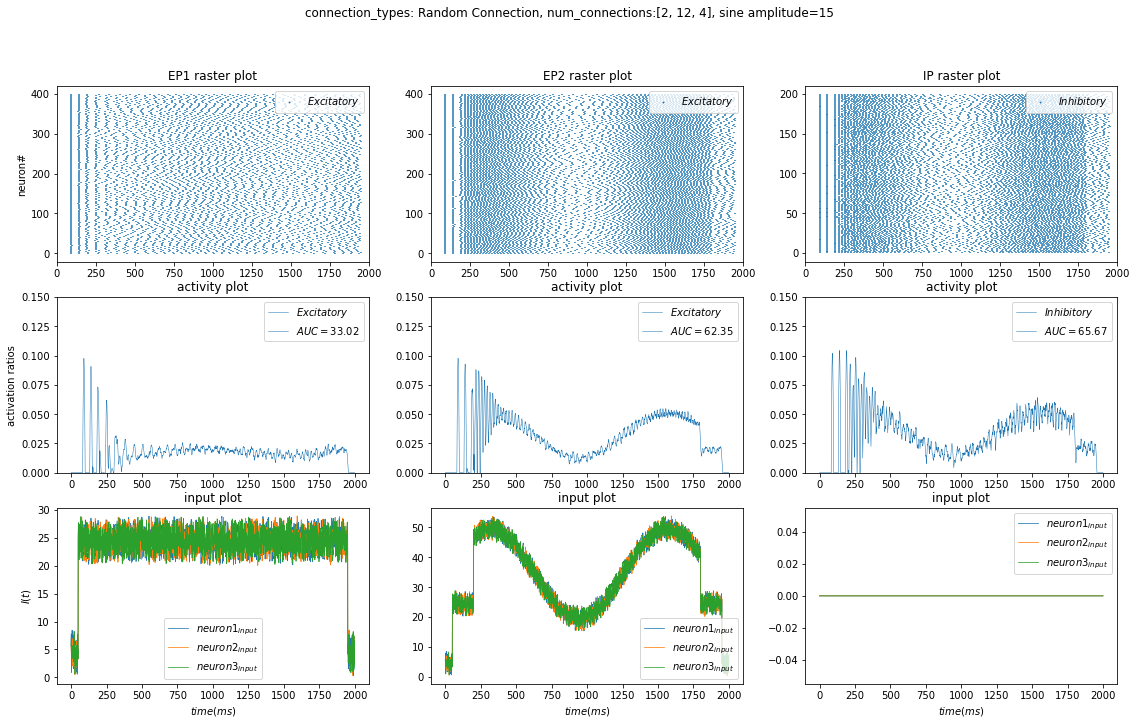

In [19]:
num_connections = [2, 12, 4]
m1, m2, m3 = run_decision_simulation(
    connection_types=connection_types,
    num_connections=num_connections, sine_amplitude=15, sine_freq=0.5, zero_time=100,
    sine_abs=False,
    step_amplitude=10
)

title = "connection_types: {}, num_connections:{}, sine amplitude={}"\
.format("Random Connection", num_connections, 15)
monitor_names = ['EP1 raster plot', 'EP2 raster plot', 'IP raster plot']
draw_decision_plots([m1, m2, m3], monitor_names=monitor_names,
                    figsize=fig_size, event_plot=True, title=title)

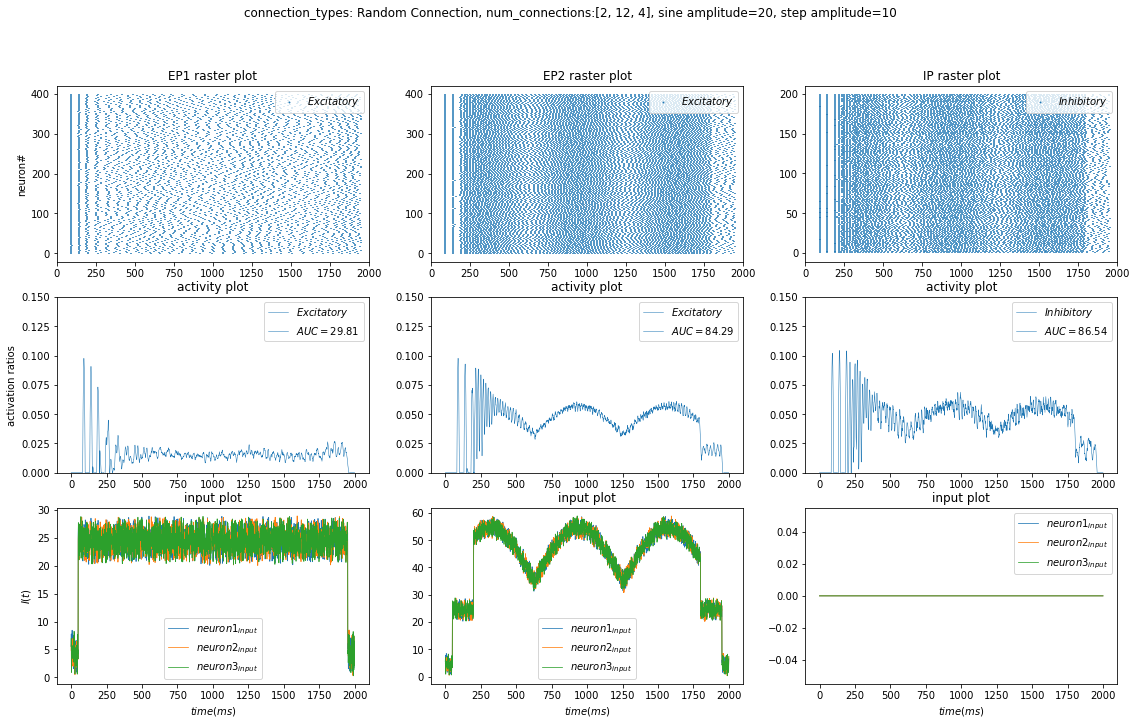

In [20]:
m1, m2, m3 = run_decision_simulation(
    connection_types=connection_types,
    num_connections=num_connections, sine_amplitude=20, sine_freq=0.5, zero_time=100,
    sine_abs=True,
    step_amplitude=10
)

title = "connection_types: {}, num_connections:{}, sine amplitude={}, step amplitude={}"\
.format("Random Connection", num_connections, 20, 10)
monitor_names = ['EP1 raster plot', 'EP2 raster plot', 'IP raster plot']
draw_decision_plots([m1, m2, m3], monitor_names=monitor_names,
                    figsize=fig_size, event_plot=True, title=title)


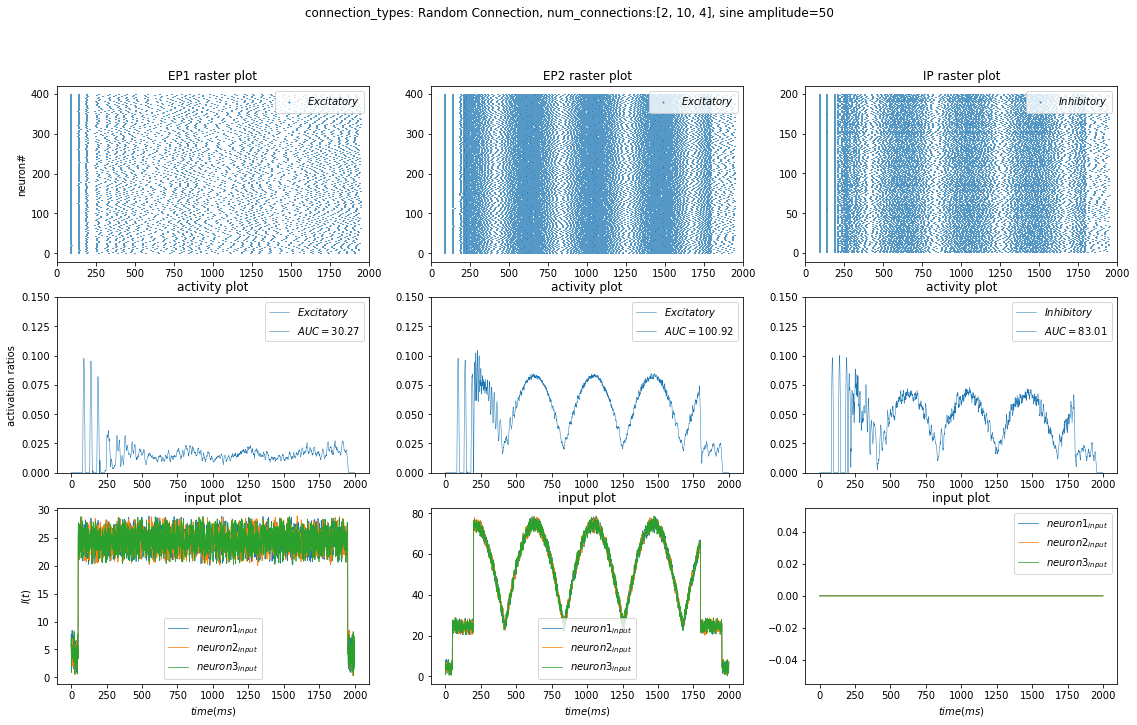

In [21]:
num_connections = [2, 10, 4]
m1, m2, m3 = run_decision_simulation(
    connection_types=connection_types,
    num_connections=num_connections, sine_amplitude=50, sine_freq=0.75, zero_time=100,
    sine_abs=True,
)

title = "connection_types: {}, num_connections:{}, sine amplitude={}"\
.format("Random Connection", num_connections, 50)
monitor_names = ['EP1 raster plot', 'EP2 raster plot', 'IP raster plot']
draw_decision_plots([m1, m2, m3], monitor_names=monitor_names,
                    figsize=fig_size, event_plot=True, title=title)

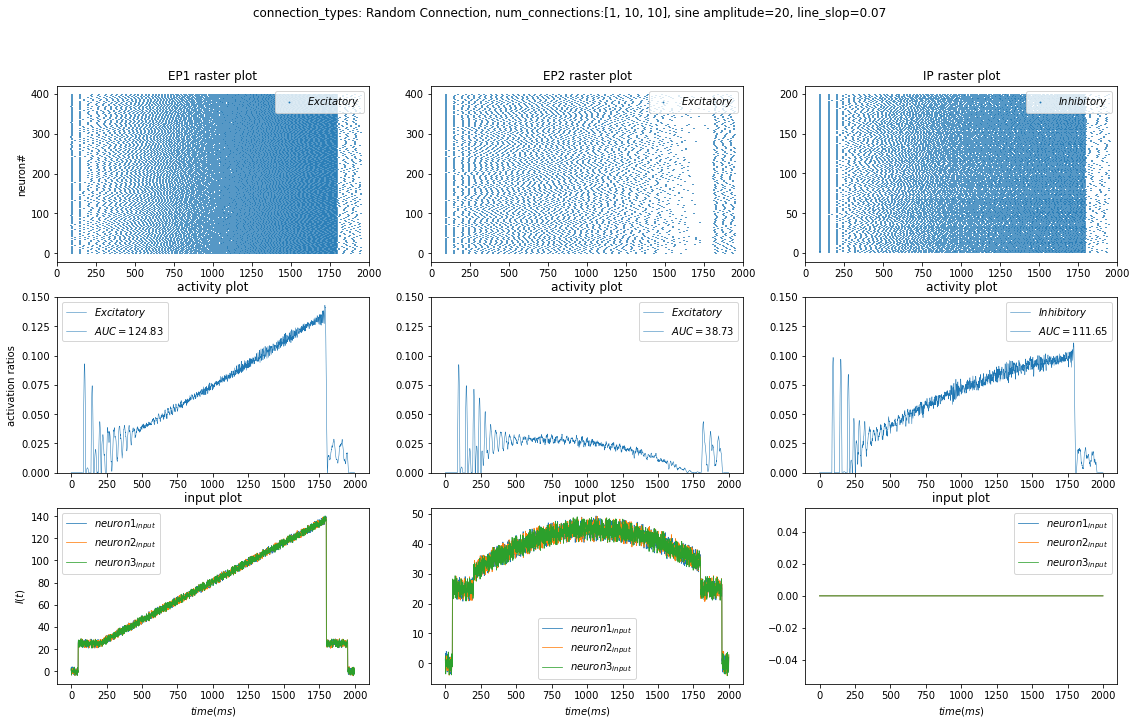

In [6]:
num_connections = [1, 10, 10]
connection_types = [RandomConnection] * 3
m1, m2, m3 = run_decision_simulation(
    connection_types=connection_types,
    num_connections=num_connections, sine_amplitude=20, sine_freq=0.15, zero_time=100,
    sine_abs=True, ep1_add_linear=True, line_slop=0.07, input_base_value=25
)

title = "connection_types: {}, num_connections:{}, sine amplitude={}, line_slop={}"\
.format("Random Connection", num_connections, 20, 0.07)
monitor_names = ['EP1 raster plot', 'EP2 raster plot', 'IP raster plot']
draw_decision_plots([m1, m2, m3], monitor_names=monitor_names,
                    figsize=fig_size, event_plot=True, title=title)

Using random connections, we clearly can see that the EP with
 dominant input and IP activities
are following the dominant EP's input, and the other EP's activity is following the opposite of
the dominant one's activity but with a smaller slope.

# Summary

1. The activities of populations are affected by the EP with dominant input current.
2. The activities of IP and dominant EP follow the dominant EP's input current.
The EP with lower activity will follow the inverse of dominant EP input current.
3. The dense connections are very susceptible to difference in EPs inputs;
that is with small amount of difference in the inputs, the activation of
 EP with lower input will be diminished drastically.
4. In contrast, the random connections are very robust, and even with
large amount of difference in EPs inputs, the one with lower input will stay
active.
5. The randomness of connections have more effect in EI and IE connections compared
to internal EE connections.
6. In all random connections scheme, slight increase in
 number of EI connections makes the system to suppress the activity of EP
  with lower input intensely. However, the increase in number of IE connections,
decreases the system's activation almost uniformly in all populations.
This also applies to $j_0$ parameters in dense connections.
7. Increase in number of EE connections will increase the overall activity of populations.
8. The activity plots of the system with random connections, more accurately follow
the dominant population's input current. These plots in the system
with dense connection scheme are very noisy and cannot be interpreted without
heavy smoothing.